## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", "The default of observed=False is deprecated.*")

In [3]:
from IPython.display import display

In [4]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import levene

## Load Data

In [5]:
train = pd.read_csv("../data/process/train_wrangling.csv")
test = pd.read_csv("../data/process/test_wrangling.csv")

## Objective

Explore the data relationships of all your features and understand how the features compare to the response variable.  
● Build data profiles and tables  
○ Inferential statistics  
● Explore data relationships  
○ Data visualization  
● Feature Selection and Engineering

In [6]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,False,False,False,True,0,False,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,False,False,False,True,0,False,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,False,False,False,True,0,False,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,True,True,True,True,2,False,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,False,True,True,True,2,False,91.0,4250.0,67.06,5500.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

## Explore each individual variable

### `policy_id`
Unique identifier of the policyholder

Check id uniqueness

In [9]:
train["policy_id"].is_unique

True

### `policy_tenure`
Time period of the policy

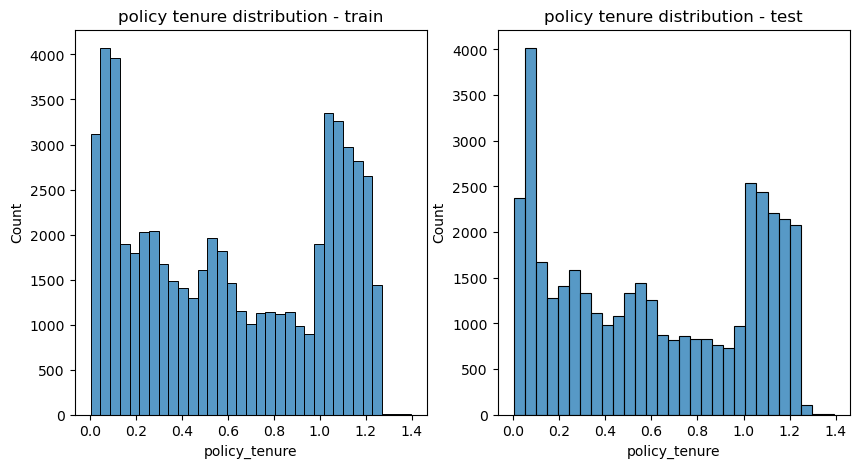

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "policy_tenure", data = train, ax = ax[0])
ax[0].set_title("policy tenure distribution - train")
sns.histplot(x = "policy_tenure", data = test, ax = ax[1])
ax[1].set_title("policy tenure distribution - test")

plt.show()

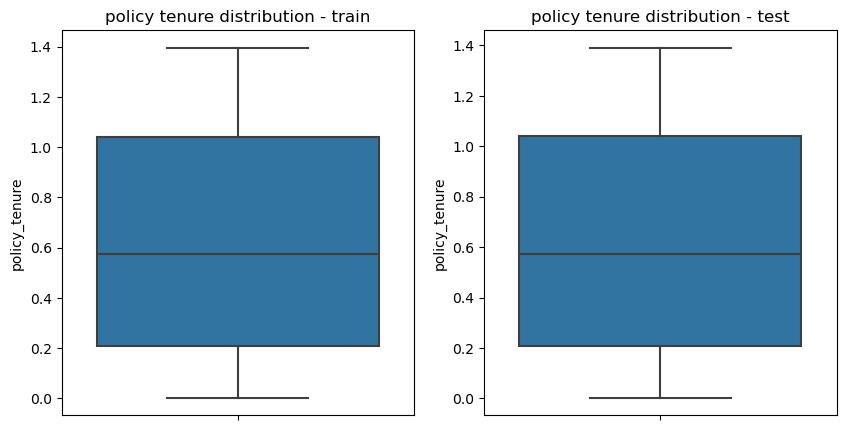

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(y = "policy_tenure", data = train, ax = ax[0])
ax[0].set_title("policy tenure distribution - train")
sns.boxplot(y = "policy_tenure", data = test, ax = ax[1])
ax[1].set_title("policy tenure distribution - test")

plt.show()

In [12]:
print(train["policy_tenure"].describe())
print("-" * 35)
print(test["policy_tenure"].describe())

count    58592.000000
mean         0.611246
std          0.414156
min          0.002735
25%          0.210250
50%          0.573792
75%          1.039104
max          1.396641
Name: policy_tenure, dtype: float64
-----------------------------------
count    39063.000000
mean         0.611304
std          0.415005
min          0.002745
25%          0.208958
50%          0.574078
75%          1.040936
max          1.391398
Name: policy_tenure, dtype: float64


### `age_of_car`
Normalized age of the car in years

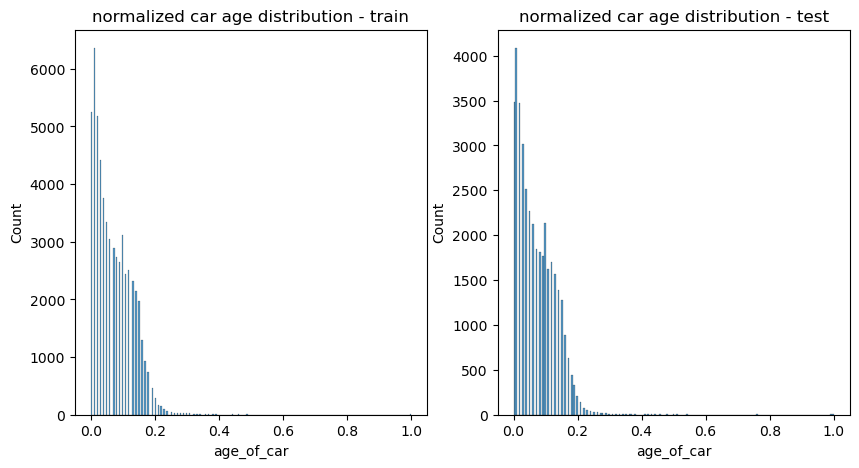

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "age_of_car", data = train, ax = ax[0])
ax[0].set_title("normalized car age distribution - train")
sns.histplot(x = "age_of_car", data = test, ax = ax[1])
ax[1].set_title("normalized car age distribution - test")

plt.show()

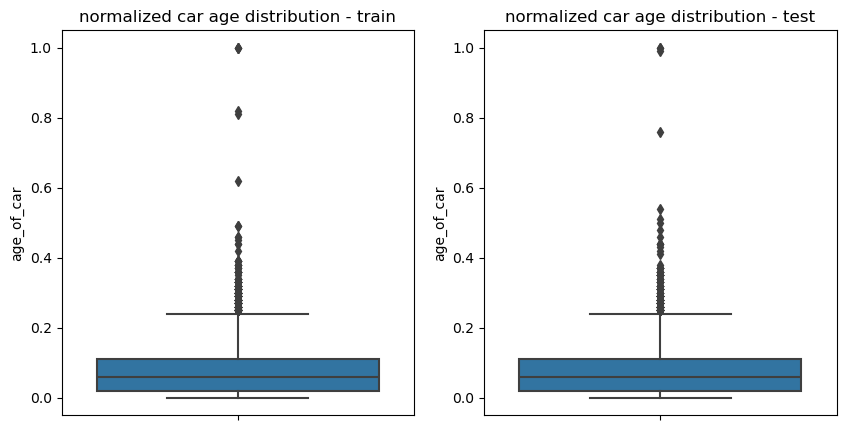

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(y = "age_of_car", data = train, ax = ax[0])
ax[0].set_title("normalized car age distribution - train")
sns.boxplot(y = "age_of_car", data = test, ax = ax[1])
ax[1].set_title("normalized car age distribution - test")

plt.show()

In [15]:
print(train["age_of_car"].describe())
print("-" * 35)
print(test["age_of_car"].describe())

count    58592.000000
mean         0.069424
std          0.056721
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64
-----------------------------------
count    39063.000000
mean         0.069635
std          0.056854
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64


### `age_of_policyhoder`
Normalized age of policyholder in years

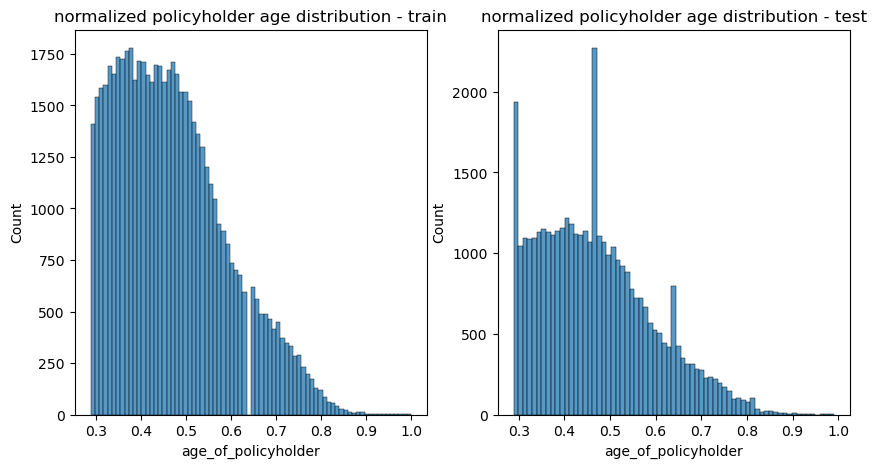

In [16]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "age_of_policyholder", data = train, ax = ax[0])
ax[0].set_title("normalized policyholder age distribution - train")
sns.histplot(x = "age_of_policyholder", data = test, ax = ax[1])
ax[1].set_title("normalized policyholder age distribution - test")

plt.show()

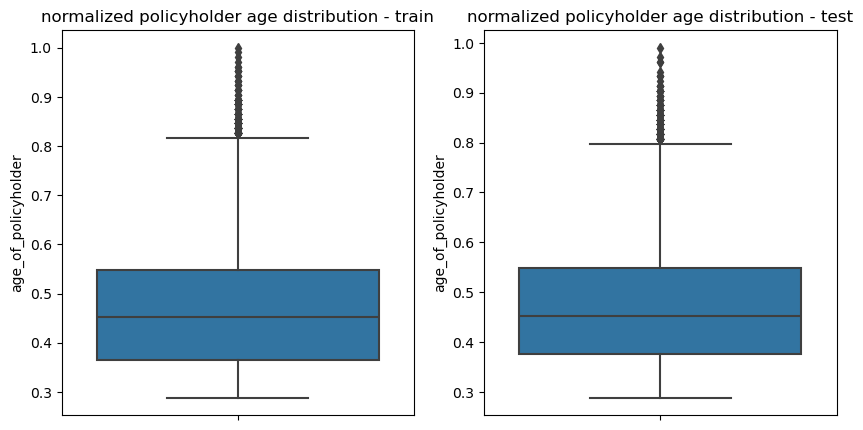

In [17]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.boxplot(y = "age_of_policyholder", data = train, ax = ax[0])
ax[0].set_title("normalized policyholder age distribution - train")
sns.boxplot(y = "age_of_policyholder", data = test, ax = ax[1])
ax[1].set_title("normalized policyholder age distribution - test")

plt.show()

In [18]:
print(train["age_of_policyholder"].describe())
print("-" * 35)
print(test["age_of_policyholder"].describe())

count    58592.000000
mean         0.469420
std          0.122886
min          0.288462
25%          0.365385
50%          0.451923
75%          0.548077
max          1.000000
Name: age_of_policyholder, dtype: float64
-----------------------------------
count    39063.000000
mean         0.469087
std          0.122072
min          0.288462
25%          0.375000
50%          0.451923
75%          0.548077
max          0.990385
Name: age_of_policyholder, dtype: float64


### `area_cluster`
Area cluster of the policyholder

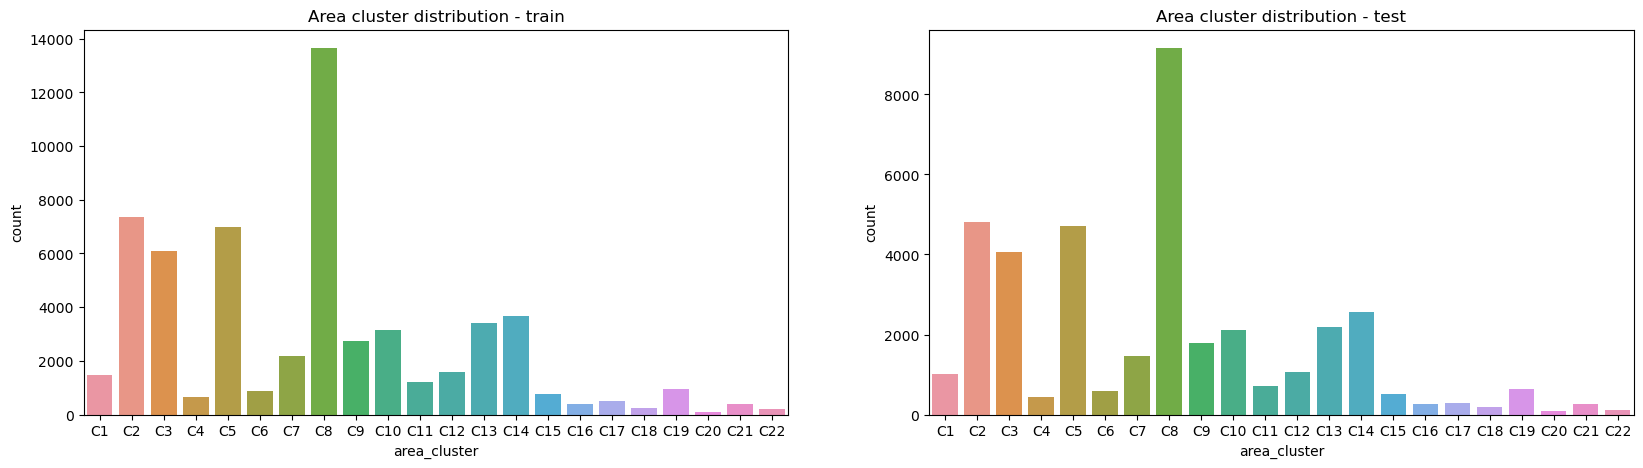

In [19]:
fig, ax = plt.subplots(1,2, figsize = (20, 5))
sns.countplot(x = "area_cluster", data = train, ax = ax[0])
ax[0].set_title("Area cluster distribution - train")
sns.countplot(x = "area_cluster", data = test, ax = ax[1], order = [f"C{x}" for x in range(1, 23)])
ax[1].set_title("Area cluster distribution - test")

plt.show()

In [20]:
train["area_cluster"] = train["area_cluster"].astype("category")
test["area_cluster"] = test["area_cluster"].astype("category")

### `population_density`
Population density of the city (Policyholder City)

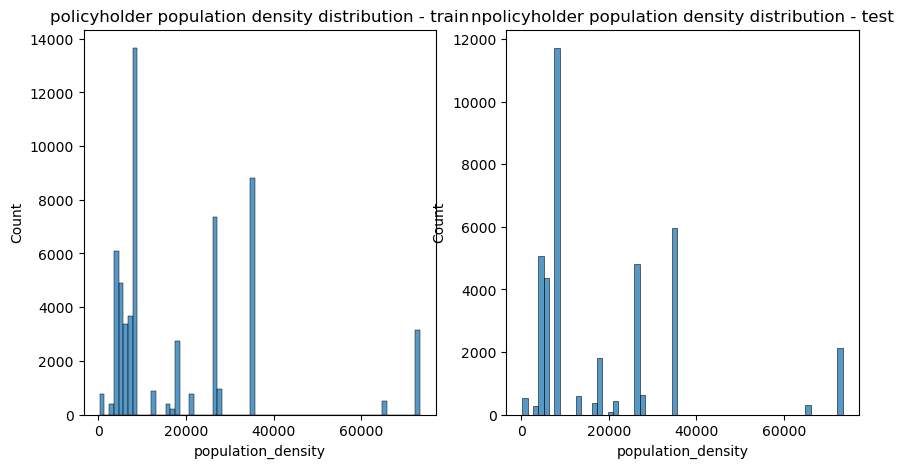

In [21]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))
sns.histplot(x = "population_density", data = train, ax = ax[0])
ax[0].set_title("policyholder population density distribution - train")
sns.histplot(x = "population_density", data = test, ax = ax[1])
ax[1].set_title("npolicyholder population density distribution - test")

plt.show()

In [22]:
print(len(train["population_density"].unique()), "values / different citys")
print(train["population_density"].value_counts(normalize = True))

22 values / different citys
population_density
8794     0.233035
27003    0.125307
34738    0.119112
4076     0.104127
7788     0.062466
5410     0.058421
73430    0.053847
17804    0.046662
6112     0.036985
34791    0.027120
4990     0.025055
6108     0.020685
27742    0.016248
13051    0.015190
290      0.013159
21622    0.011350
65567    0.008397
16206    0.006844
3264     0.006468
35036    0.004130
16733    0.003533
20905    0.001860
Name: proportion, dtype: float64


In [23]:
print(len(test["population_density"].unique()), "values / different citys")
print(test["population_density"].value_counts(normalize = True))

22 values / different citys
population_density
8794     0.234519
27003    0.123288
34738    0.120421
4076     0.104216
7788     0.065407
5410     0.056191
73430    0.054220
17804    0.046079
6112     0.037427
34791    0.027315
4990     0.025728
6108     0.017971
27742    0.016102
13051    0.015334
290      0.013235
21622    0.011443
65567    0.007578
16206    0.007040
3264     0.006938
35036    0.004582
16733    0.002790
20905    0.002176
Name: proportion, dtype: float64


### `make`
Encoded Manufacturer/company of the car

In [24]:
print(train["make"].value_counts(normalize = True))
print("-" * 25)
print(test["make"].value_counts(normalize = True))

make
1    0.650703
3    0.239248
2    0.040500
5    0.036080
4    0.033469
Name: proportion, dtype: float64
-------------------------
make
1    0.649361
3    0.239741
2    0.042239
5    0.035686
4    0.032972
Name: proportion, dtype: float64


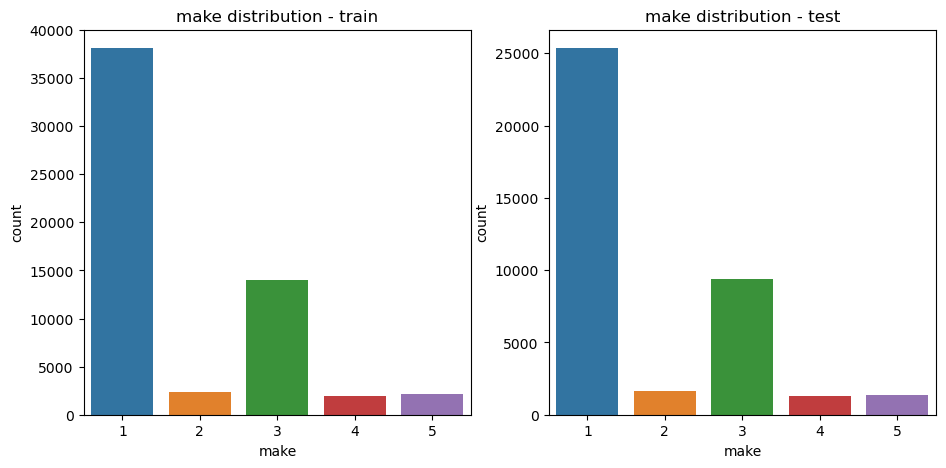

In [25]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "make", data = train, ax = ax[0])
ax[0].set_title("make distribution - train")
sns.countplot(x = "make", data = test, ax = ax[1])
ax[1].set_title("make distribution - test")

plt.show()

In [26]:
train["make"] = train["make"].astype("category")
test["make"] = test["make"].astype("category")

### `segment`
Segment of the car (A/ B1/ B2/ C1/ C2)

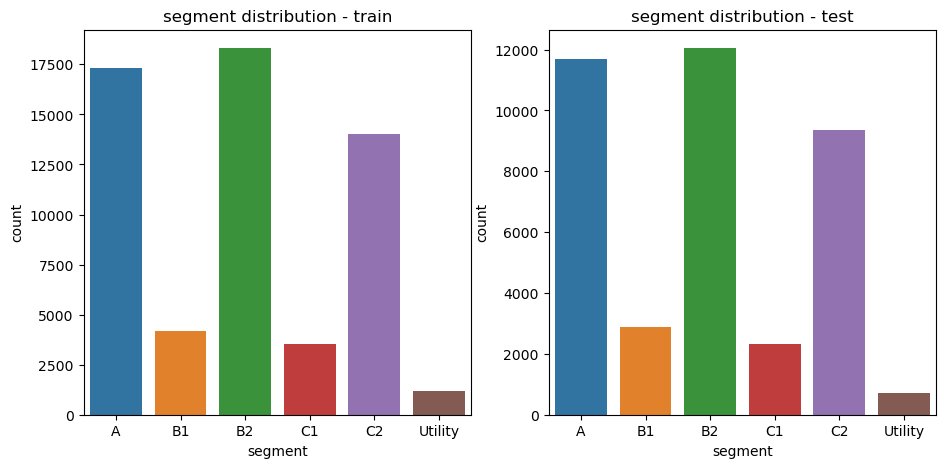

In [27]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "segment", data = train, ax = ax[0], order = ["A", "B1", "B2", "C1", "C2", "Utility"])
ax[0].set_title("segment distribution - train")
sns.countplot(x = "segment", data = test, ax = ax[1], order = ["A", "B1", "B2", "C1", "C2", "Utility"])
ax[1].set_title("segment distribution - test")

plt.show()

In [28]:
train["segment"] = train["segment"].astype("category")
test["segment"] = test["segment"].astype("category")

### `model`
Encoded name of the car

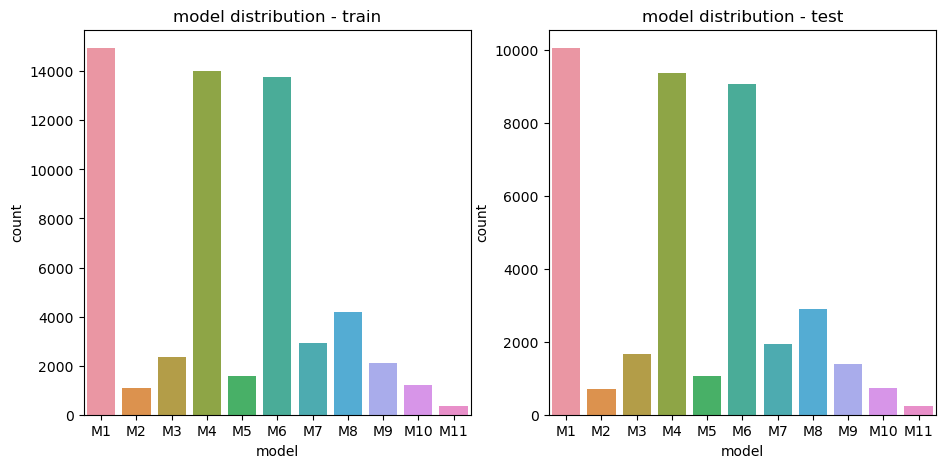

In [29]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "model", data = train, ax = ax[0])
ax[0].set_title("model distribution - train")
sns.countplot(x = "model", data = test, ax = ax[1], order = [f"M{x}" for x in range(1, 12)])
ax[1].set_title("model distribution - test")

plt.show()

In [30]:
train["model"] = train["model"].astype("category")
test["model"] = test["model"].astype("category")

### `fuel_type`
Type of fuel used by the car

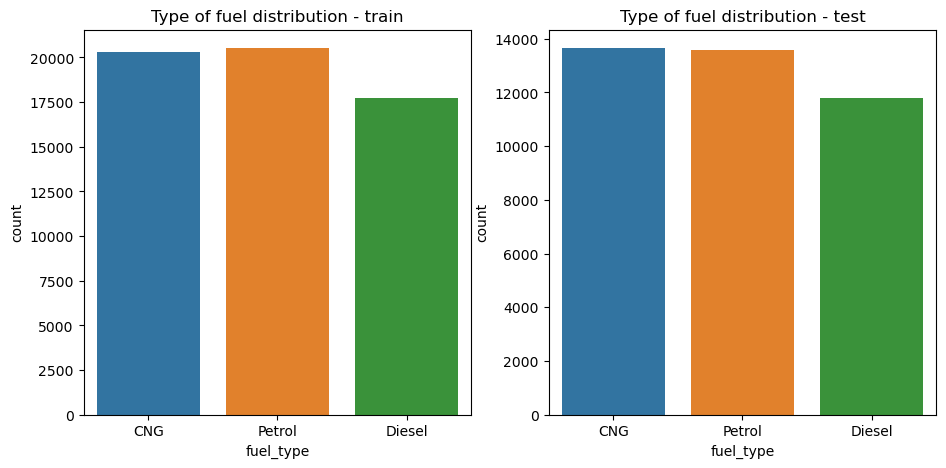

In [31]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "fuel_type", data = train, ax = ax[0])
ax[0].set_title("Type of fuel distribution - train")
sns.countplot(x = "fuel_type", data = test, ax = ax[1])
ax[1].set_title("Type of fuel distribution - test")

plt.show()

In [32]:
train["fuel_type"] = train["fuel_type"].astype("category")
test["fuel_type"] = test["fuel_type"].astype("category")

### `max_torque`, `max_torque_Nm`, `max_torque_rpm`
Maximum Torque generated by the car (Nm@rpm)

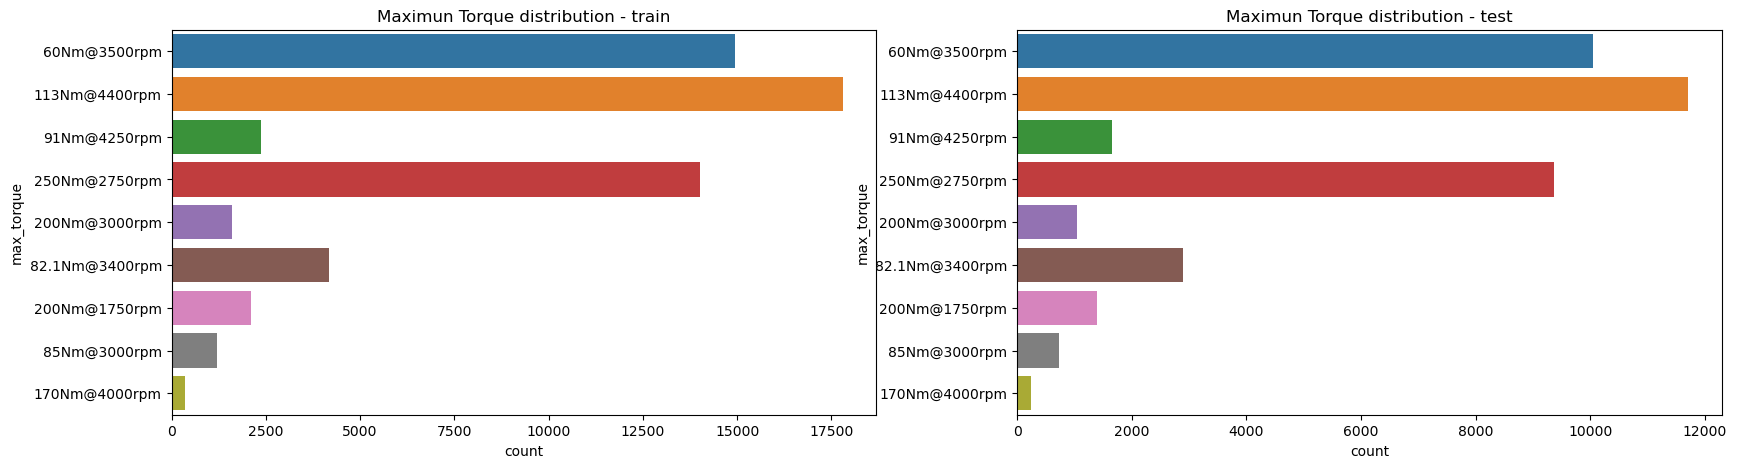

In [33]:
fig, ax = plt.subplots(1,2, figsize = (20, 5))
sns.countplot(y = "max_torque", data = train, ax = ax[0], order = [x for x in train["max_torque"].unique()])
ax[0].set_title("Maximun Torque distribution - train")
sns.countplot(y = "max_torque", data = test, ax = ax[1], order = [x for x in train["max_torque"].unique()])
ax[1].set_title("Maximun Torque distribution - test")

plt.show()

In [34]:
train[["max_torque", "max_power"]]

,max_torque,max_power
0,60Nm@3500rpm,40.36bhp@6000rpm
1,60Nm@3500rpm,40.36bhp@6000rpm
2,60Nm@3500rpm,40.36bhp@6000rpm
3,113Nm@4400rpm,88.50bhp@6000rpm
4,91Nm@4250rpm,67.06bhp@5500rpm
...,...,...
58587,91Nm@4250rpm,67.06bhp@5500rpm
58588,60Nm@3500rpm,40.36bhp@6000rpm
58589,60Nm@3500rpm,40.36bhp@6000rpm
58590,113Nm@4400rpm,88.50bhp@6000rpm


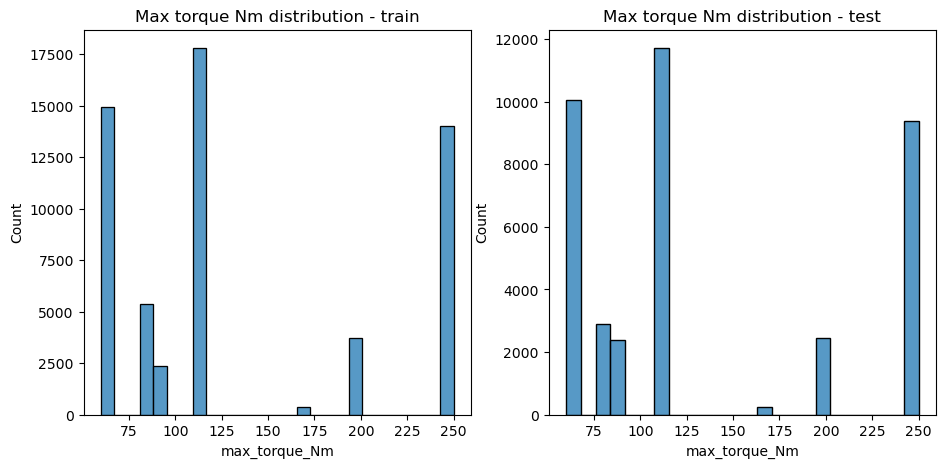

In [35]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_torque_Nm", data = train, ax = ax[0])
ax[0].set_title("Max torque Nm distribution - train")
sns.histplot(x = "max_torque_Nm", data = test, ax = ax[1])
ax[1].set_title("Max torque Nm distribution - test")

plt.show()

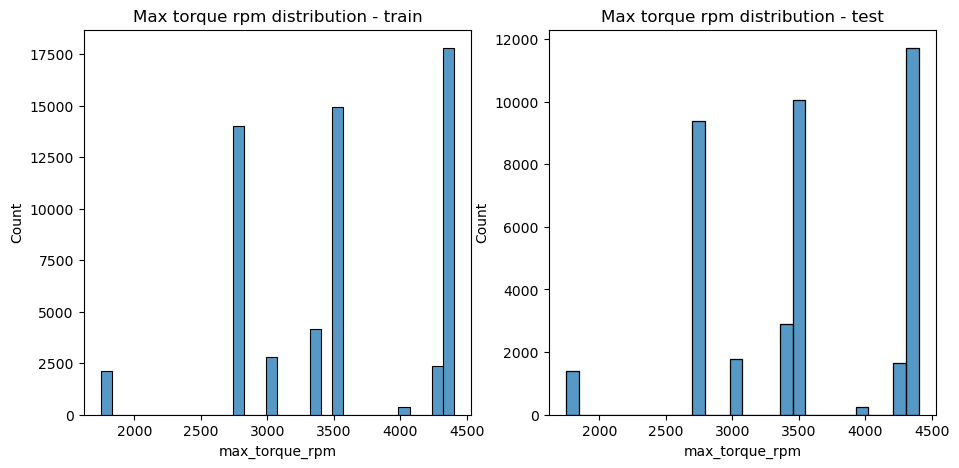

In [36]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_torque_rpm", data = train, ax = ax[0])
ax[0].set_title("Max torque rpm distribution - train")
sns.histplot(x = "max_torque_rpm", data = test, ax = ax[1])
ax[1].set_title("Max torque rpm distribution - test")

plt.show()

### `max_power`, `max_power_bhp`, `max_power_rpm`
Maximum Power generated by the car (bhp@rpm)

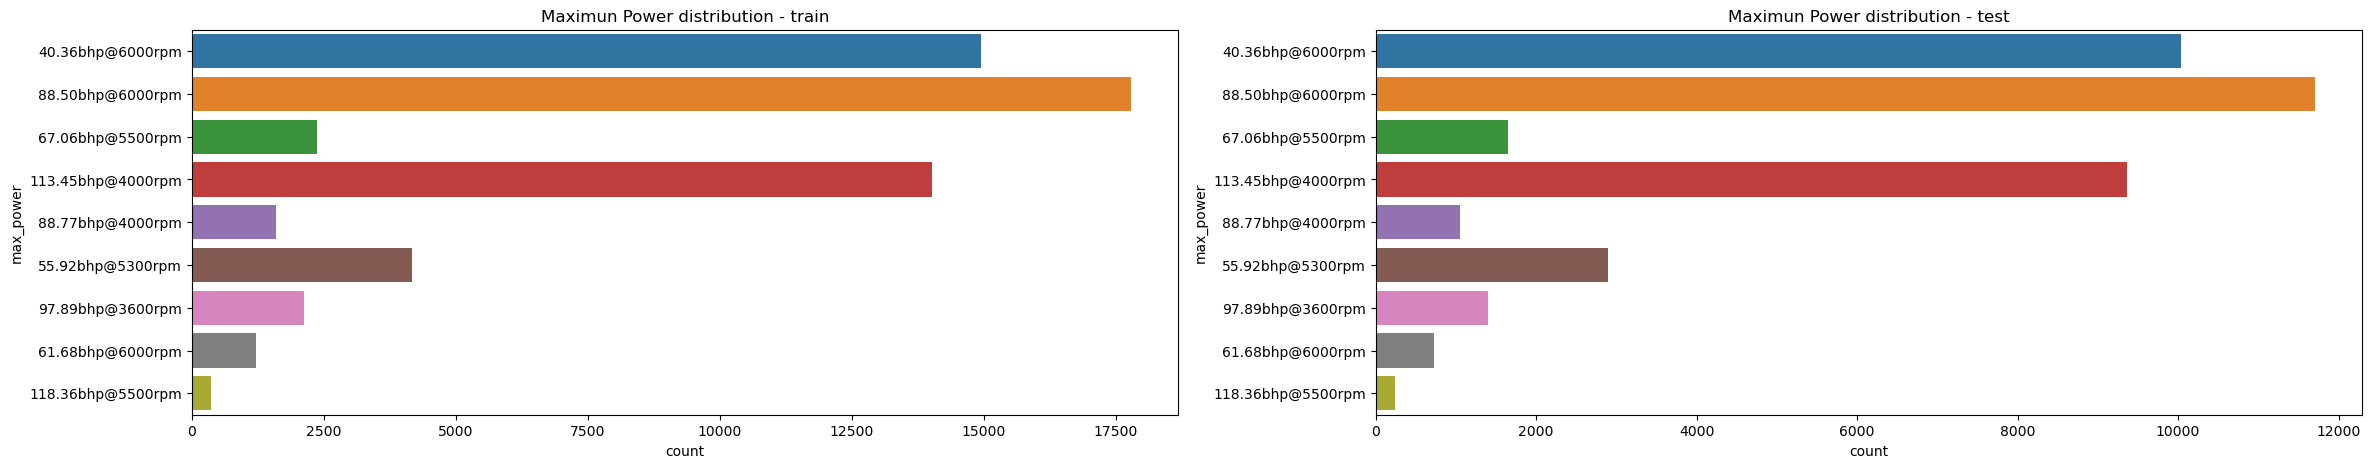

In [37]:
fig, ax = plt.subplots(1,2, figsize = (28, 5))
sns.countplot(y = "max_power", data = train, ax = ax[0], order = [x for x in train["max_power"].unique()])
ax[0].set_title("Maximun Power distribution - train")
sns.countplot(y = "max_power", data = test, ax = ax[1], order = [x for x in train["max_power"].unique()])
ax[1].set_title("Maximun Power distribution - test")

plt.show()

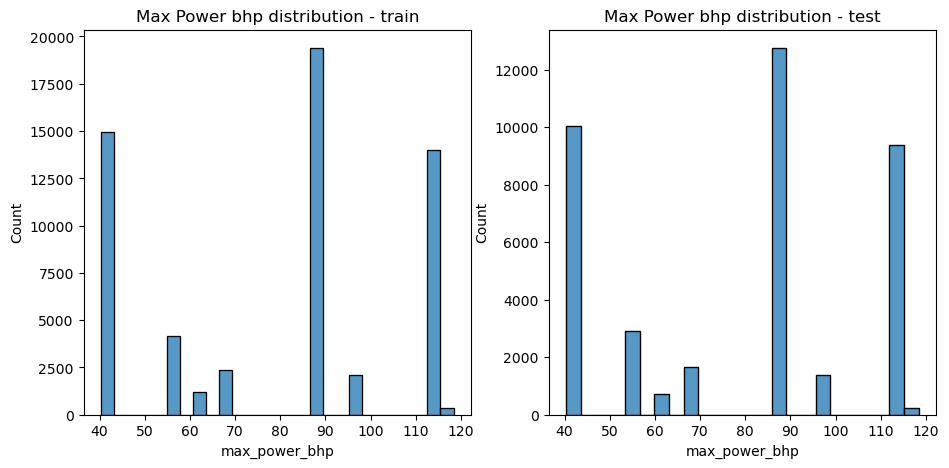

In [38]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_power_bhp", data = train, ax = ax[0])
ax[0].set_title("Max Power bhp distribution - train")
sns.histplot(x = "max_power_bhp", data = test, ax = ax[1])
ax[1].set_title("Max Power bhp distribution - test")

plt.show()

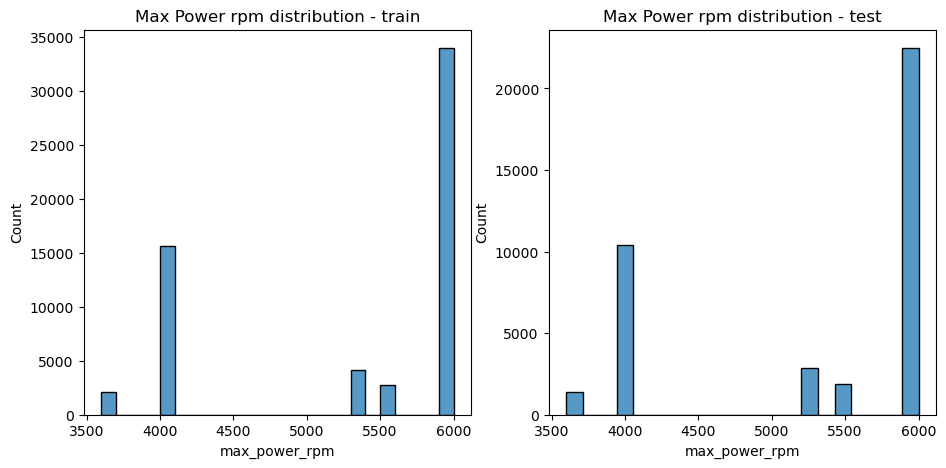

In [39]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "max_power_rpm", data = train, ax = ax[0])
ax[0].set_title("Max Power rpm distribution - train")
sns.histplot(x = "max_power_rpm", data = test, ax = ax[1])
ax[1].set_title("Max Power rpm distribution - test")

plt.show()

### `engine_type`
Type of engine used in the car

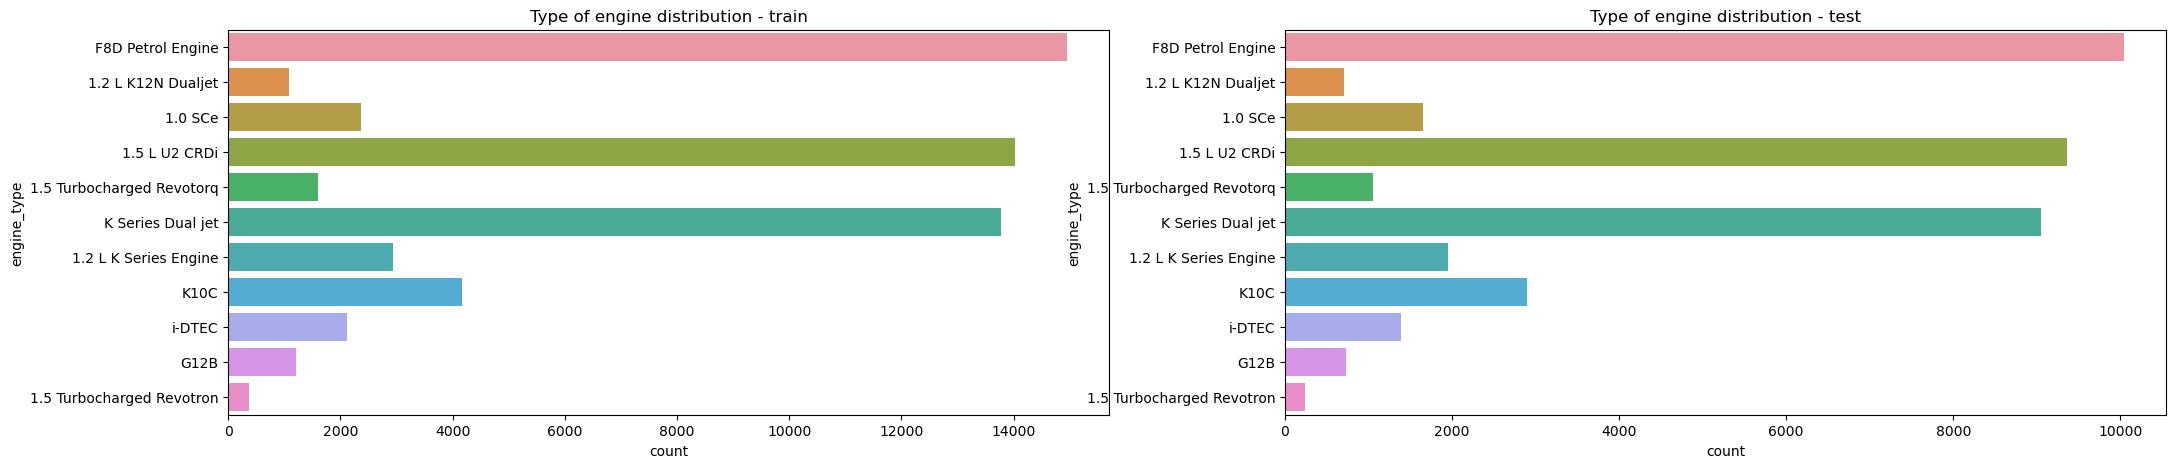

In [40]:
fig, ax = plt.subplots(1,2, figsize = (25, 5))
sns.countplot(y = "engine_type", data = train, ax = ax[0], order = [x for x in train["engine_type"].unique()])
ax[0].set_title("Type of engine distribution - train")
sns.countplot(y = "engine_type", data = test, ax = ax[1], order = [x for x in train["engine_type"].unique()])
ax[1].set_title("Type of engine distribution - test")

plt.show()

In [41]:
train["engine_type"] = train["engine_type"].astype("category")
test["engine_type"] = test["engine_type"].astype("category")

### `airbags`
Number of airbags installed in the car

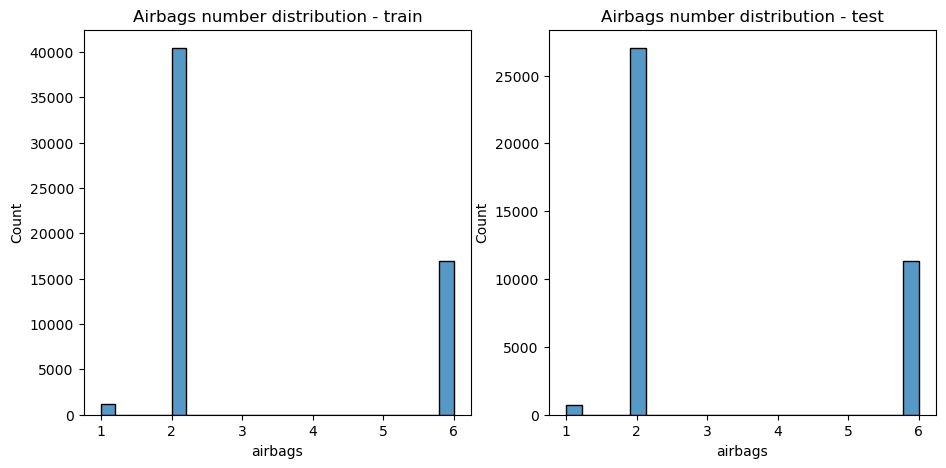

In [42]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "airbags", data = train, ax = ax[0])
ax[0].set_title("Airbags number distribution - train")
sns.histplot(x = "airbags", data = test, ax = ax[1])
ax[1].set_title("Airbags number distribution - test")

plt.show()

### `is_esc`
Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not
### `is_adjustable_steering`
Boolean flag indicating whether the steering wheel of the car is adjustable or not
### `is_tpms`
Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not
### `is_parking_sensors`
Boolean flag indicating whether parking sensors are present in the car or not
### `is_parking_camera`
Boolean flag indicating whether the parking camera is present in the car or not  

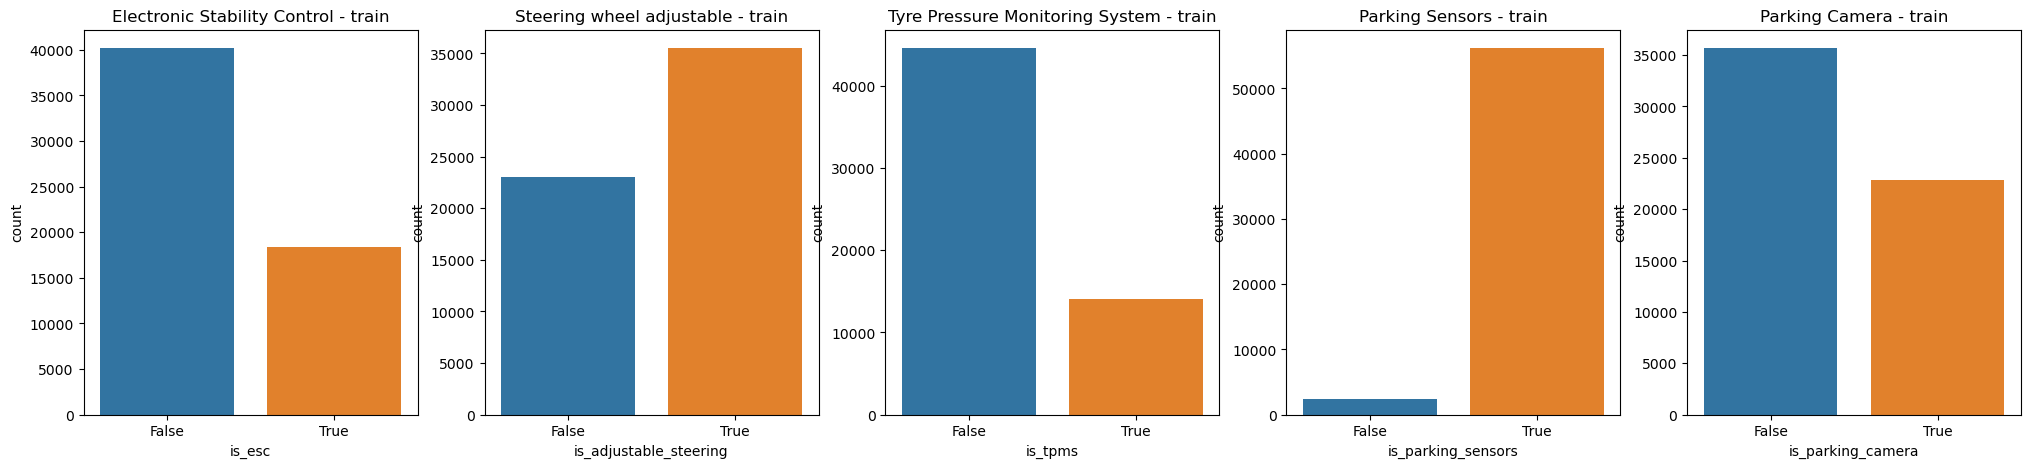

In [43]:
fig, ax = plt.subplots(1,5, figsize = (25, 5))
sns.countplot(x = "is_esc", data = train, ax = ax[0])
ax[0].set_title("Electronic Stability Control - train")
sns.countplot(x = "is_adjustable_steering", data = train, ax = ax[1])
ax[1].set_title("Steering wheel adjustable - train")
sns.countplot(x = "is_tpms", data = train, ax = ax[2])
ax[2].set_title("Tyre Pressure Monitoring System - train")
sns.countplot(x = "is_parking_sensors", data = train, ax = ax[3])
ax[3].set_title("Parking Sensors - train")
sns.countplot(x = "is_parking_camera", data = train, ax = ax[4])
ax[4].set_title("Parking Camera - train")

plt.show()

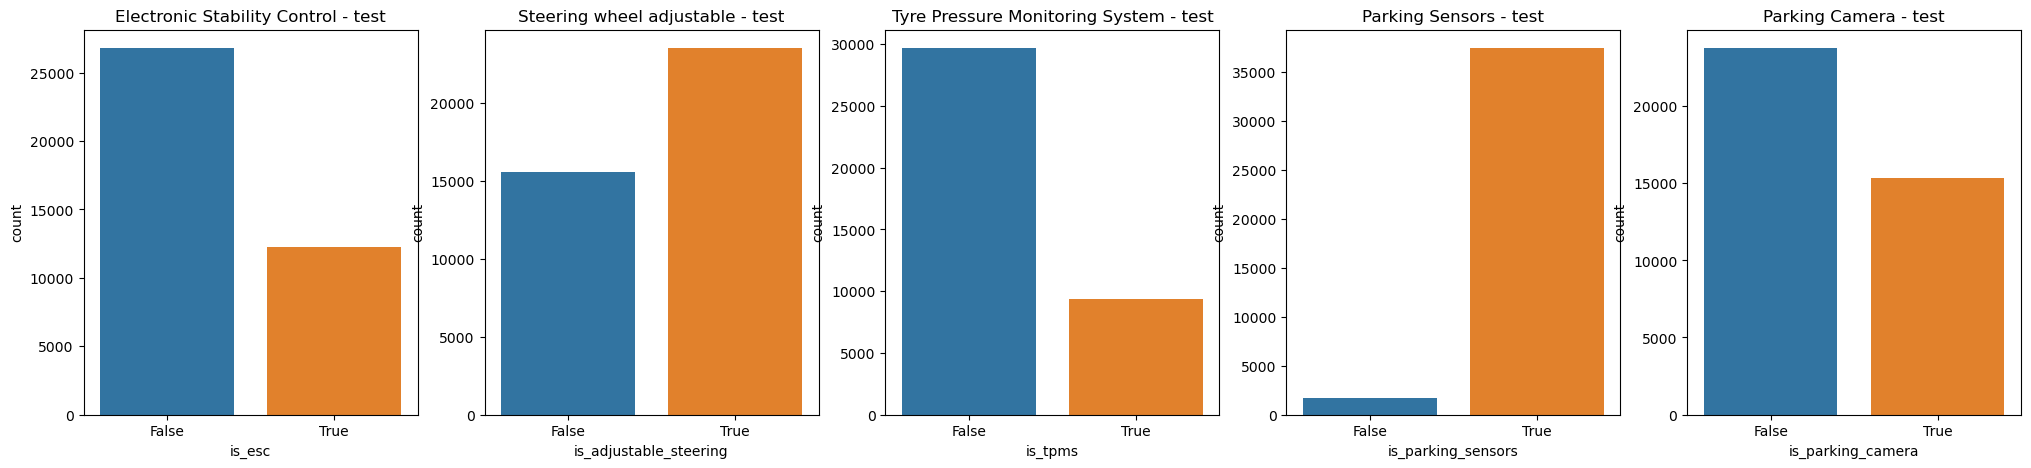

In [44]:
fig, ax = plt.subplots(1,5, figsize = (25, 5))
sns.countplot(x = "is_esc", data = test, ax = ax[0])
ax[0].set_title("Electronic Stability Control - test")
sns.countplot(x = "is_adjustable_steering", data = test, ax = ax[1])
ax[1].set_title("Steering wheel adjustable - test")
sns.countplot(x = "is_tpms", data = test, ax = ax[2])
ax[2].set_title("Tyre Pressure Monitoring System - test")
sns.countplot(x = "is_parking_sensors", data = test, ax = ax[3])
ax[3].set_title("Parking Sensors - test")
sns.countplot(x = "is_parking_camera", data = test, ax = ax[4])
ax[4].set_title("Parking Camera - test")

plt.show()

### `rear_brakes_type`
Type of brakes used in the rear of the car

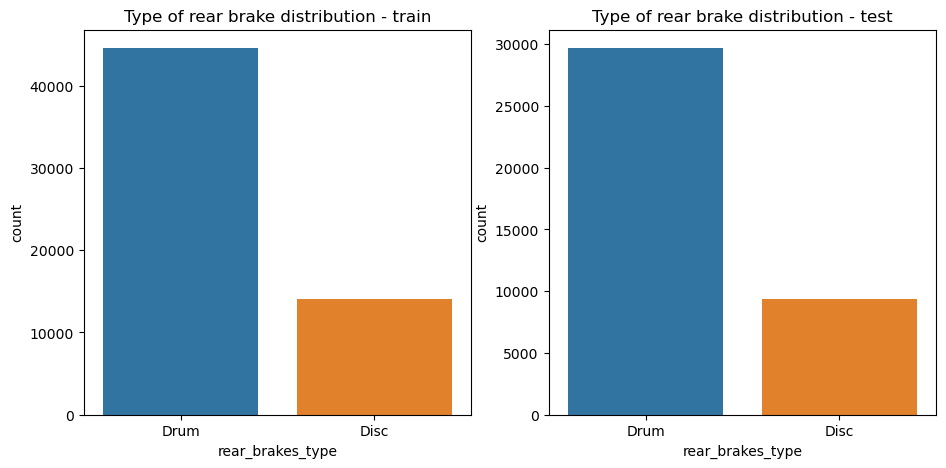

In [45]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "rear_brakes_type", data = train, ax = ax[0])
ax[0].set_title("Type of rear brake distribution - train")
sns.countplot(x = "rear_brakes_type", data = test, ax = ax[1])
ax[1].set_title("Type of rear brake distribution - test")

plt.show()

In [46]:
train["rear_brakes_type"] = train["rear_brakes_type"].astype("category")
test["rear_brakes_type"] = test["rear_brakes_type"].astype("category")

### `displacement`
Engine displacement of the car (cc)

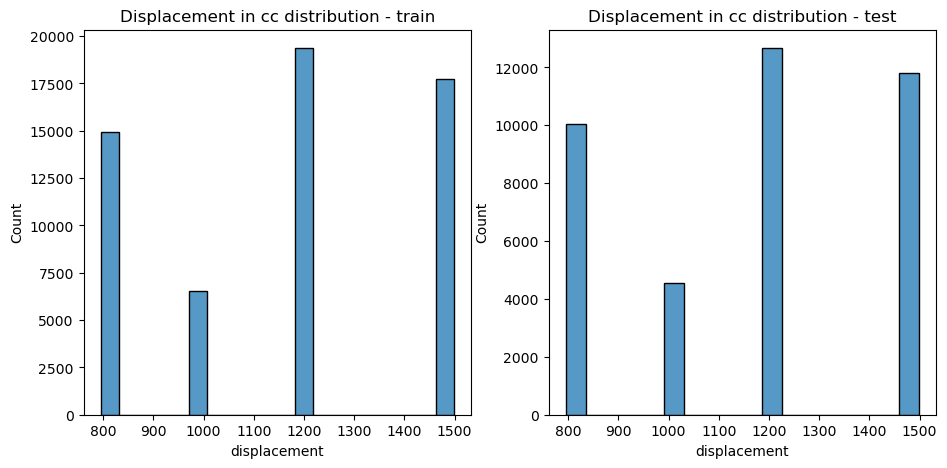

In [47]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "displacement", data = train, ax = ax[0])
ax[0].set_title("Displacement in cc distribution - train")
sns.histplot(x = "displacement", data = test, ax = ax[1])
ax[1].set_title("Displacement in cc distribution - test")

plt.show()

### `cylinder`
Number of cylinders present in the engine of the car

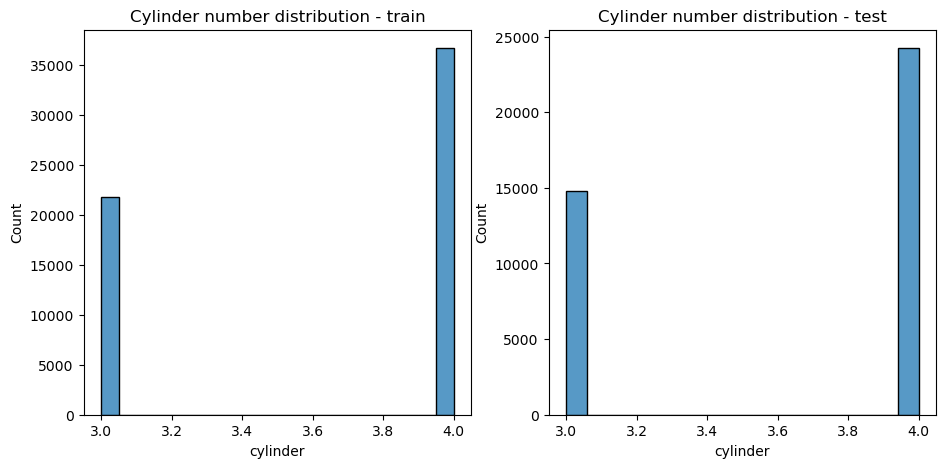

In [48]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "cylinder", data = train, ax = ax[0])
ax[0].set_title("Cylinder number distribution - train")
sns.histplot(x = "cylinder", data = test, ax = ax[1])
ax[1].set_title("Cylinder number distribution - test")

plt.show()

### `transmission_type`
Transmission type of the car

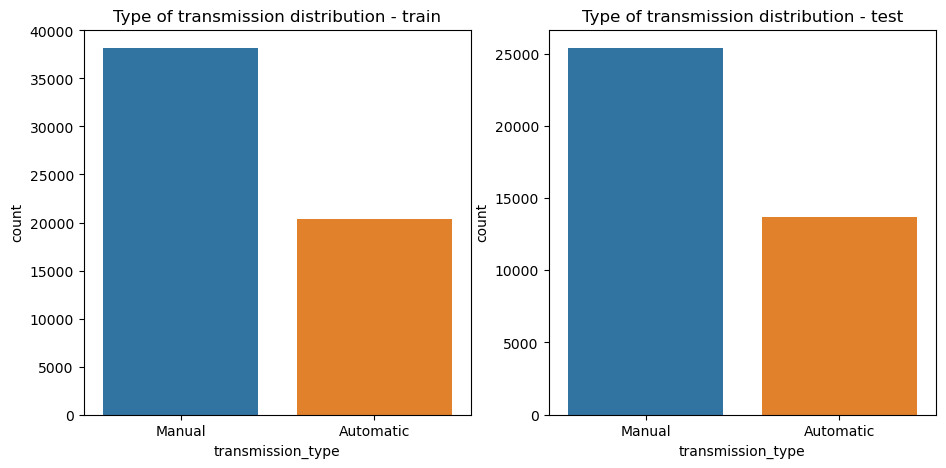

In [49]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "transmission_type", data = train, ax = ax[0])
ax[0].set_title("Type of transmission distribution - train")
sns.countplot(x = "transmission_type", data = test, ax = ax[1])
ax[1].set_title("Type of transmission distribution - test")

plt.show()

In [50]:
train["transmission_type"] = train["transmission_type"].astype("category")
test["transmission_type"] = test["transmission_type"].astype("category")

### `gear_box`
Number of gears in the car

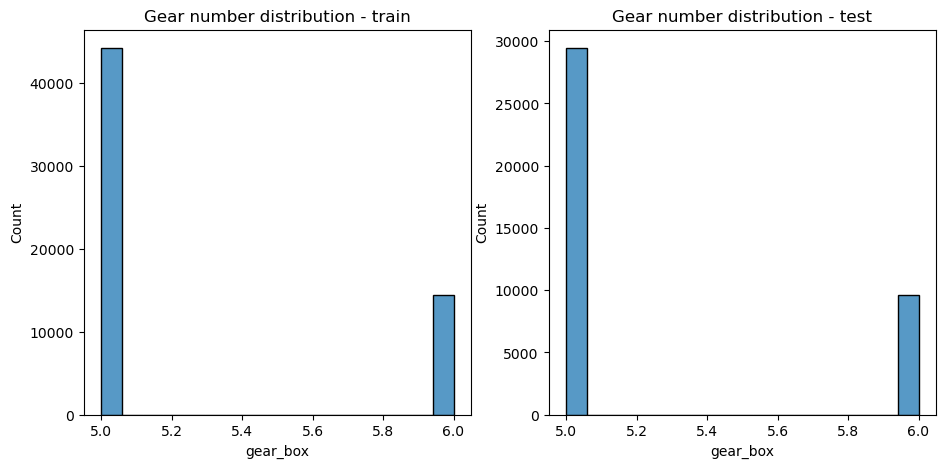

In [51]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "gear_box", data = train, ax = ax[0])
ax[0].set_title("Gear number distribution - train")
sns.histplot(x = "gear_box", data = test, ax = ax[1])
ax[1].set_title("Gear number distribution - test")

plt.show()

### `steering_type`
Type of the power steering present in the car

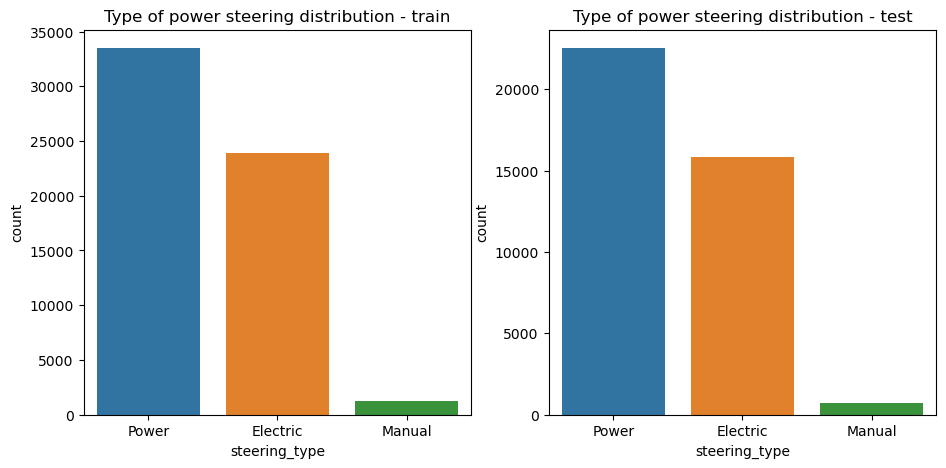

In [52]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.countplot(x = "steering_type", data = train, ax = ax[0])
ax[0].set_title("Type of power steering distribution - train")
sns.countplot(x = "steering_type", data = test, ax = ax[1])
ax[1].set_title("Type of power steering distribution - test")

plt.show()

In [53]:
train["steering_type"] = train["steering_type"].astype("category")
test["steering_type"] = test["steering_type"].astype("category")

### `turning_radius`
The space a vehicle needs to make a certain turn (Meters)

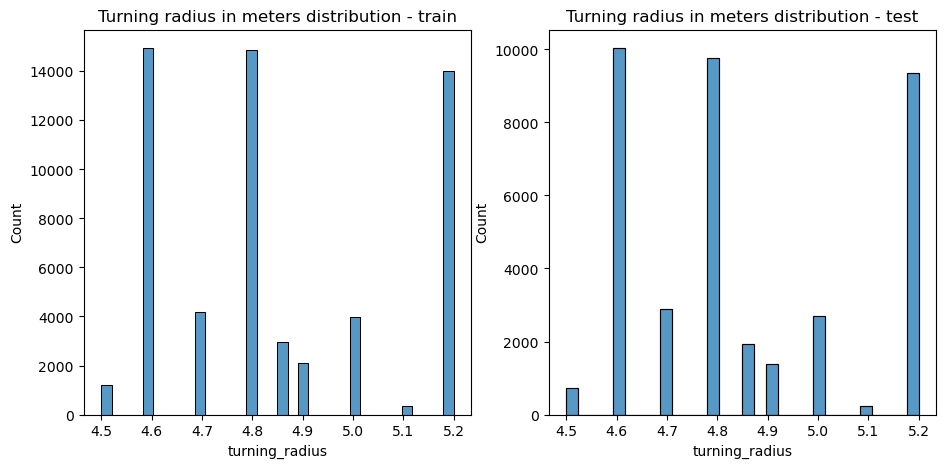

In [54]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "turning_radius", data = train, ax = ax[0])
ax[0].set_title("Turning radius in meters distribution - train")
sns.histplot(x = "turning_radius", data = test, ax = ax[1])
ax[1].set_title("Turning radius in meters distribution - test")

plt.show()

### `length`
Length of the car (Millimetre)

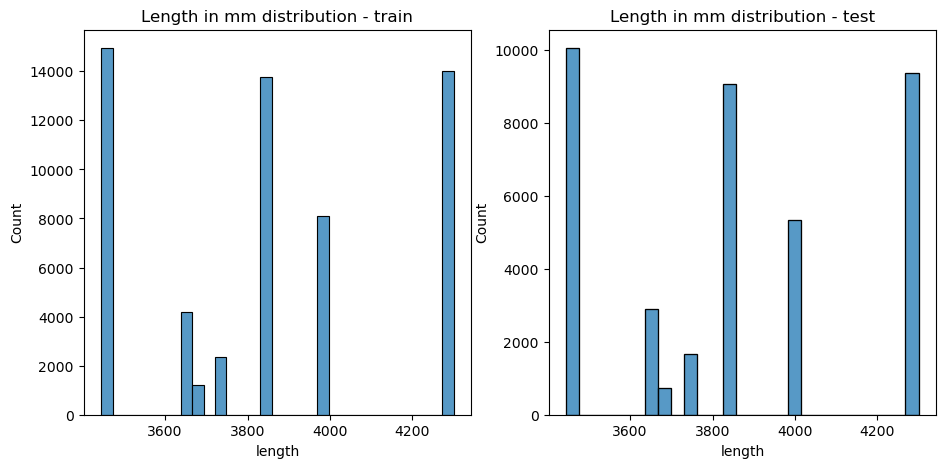

In [55]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "length", data = train, ax = ax[0])
ax[0].set_title("Length in mm distribution - train")
sns.histplot(x = "length", data = test, ax = ax[1])
ax[1].set_title("Length in mm distribution - test")

plt.show()

### `width`
Width of the car (Millimetre)

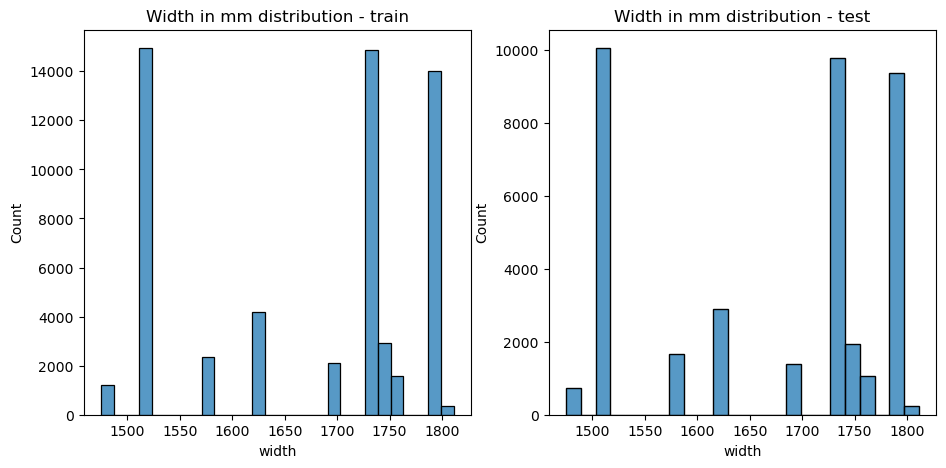

In [56]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "width", data = train, ax = ax[0])
ax[0].set_title("Width in mm distribution - train")
sns.histplot(x = "width", data = test, ax = ax[1])
ax[1].set_title("Width in mm distribution - test")

plt.show()

### `height`
Height of the car (Millimetre)

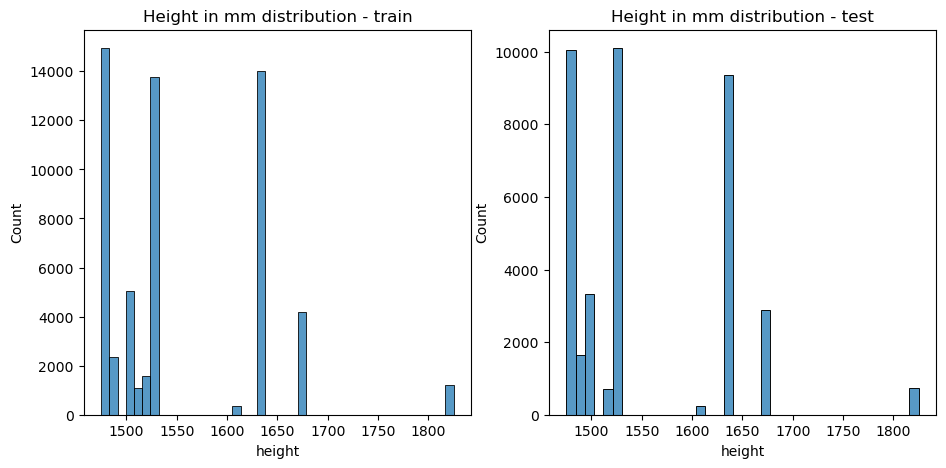

In [57]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "height", data = train, ax = ax[0])
ax[0].set_title("Height in mm distribution - train")
sns.histplot(x = "height", data = test, ax = ax[1])
ax[1].set_title("Height in mm distribution - test")

plt.show()

### `gross_weight`
The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

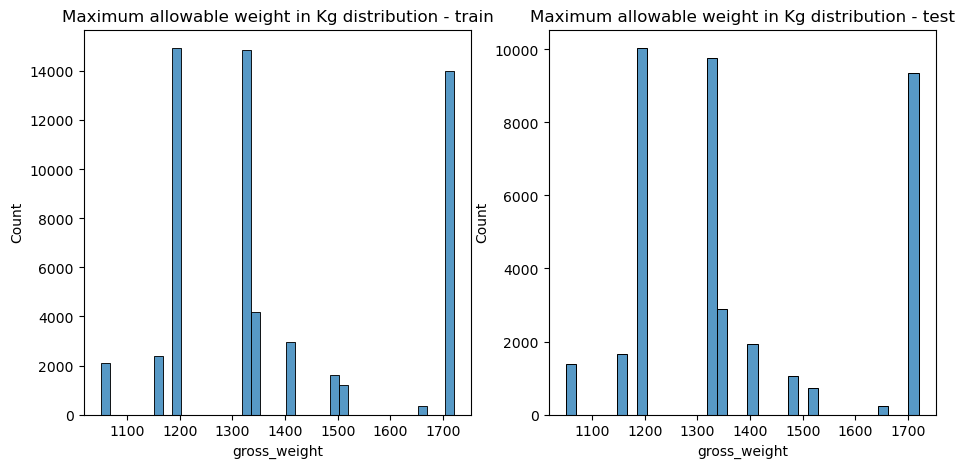

In [58]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "gross_weight", data = train, ax = ax[0])
ax[0].set_title("Maximum allowable weight in Kg distribution - train")
sns.histplot(x = "gross_weight", data = test, ax = ax[1])
ax[1].set_title("Maximum allowable weight in Kg distribution - test")

plt.show()

### `is_front_fog_lights`
Boolean flag indicating whether front fog lights are available in the car or not
### `is_rear_window_wiper`
Boolean flag indicating whether the rear window wiper is available in the car or not
### `is_rear_window_washer`
Boolean flag indicating whether the rear window washer is available in the car or not
### `is_rear_window_defogger`
Boolean flag indicating whether rear window defogger is available in the car or not
### `is_brake_assist`
Boolean flag indicating whether the brake assistance feature is available in the car or not
### `is_power_door_locks`
Boolean flag indicating whether a power door lock is available in the car or not

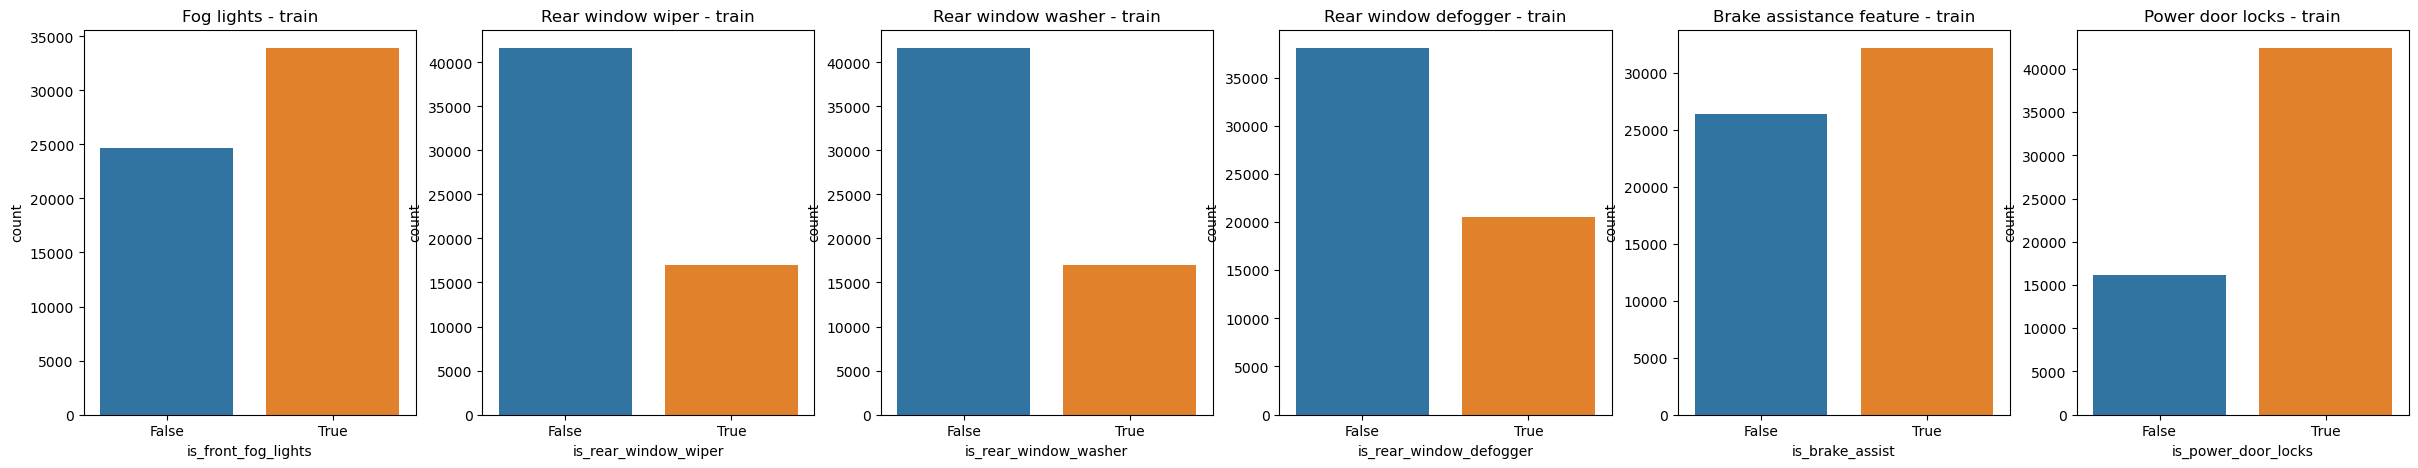

In [59]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_front_fog_lights", data = train, ax = ax[0])
ax[0].set_title("Fog lights - train")
sns.countplot(x = "is_rear_window_wiper", data = train, ax = ax[1])
ax[1].set_title("Rear window wiper - train")
sns.countplot(x = "is_rear_window_washer", data = train, ax = ax[2])
ax[2].set_title("Rear window washer - train")
sns.countplot(x = "is_rear_window_defogger", data = train, ax = ax[3])
ax[3].set_title("Rear window defogger - train")
sns.countplot(x = "is_brake_assist", data = train, ax = ax[4])
ax[4].set_title("Brake assistance feature - train")
sns.countplot(x = "is_power_door_locks", data = train, ax = ax[5])
ax[5].set_title("Power door locks - train")

plt.show()

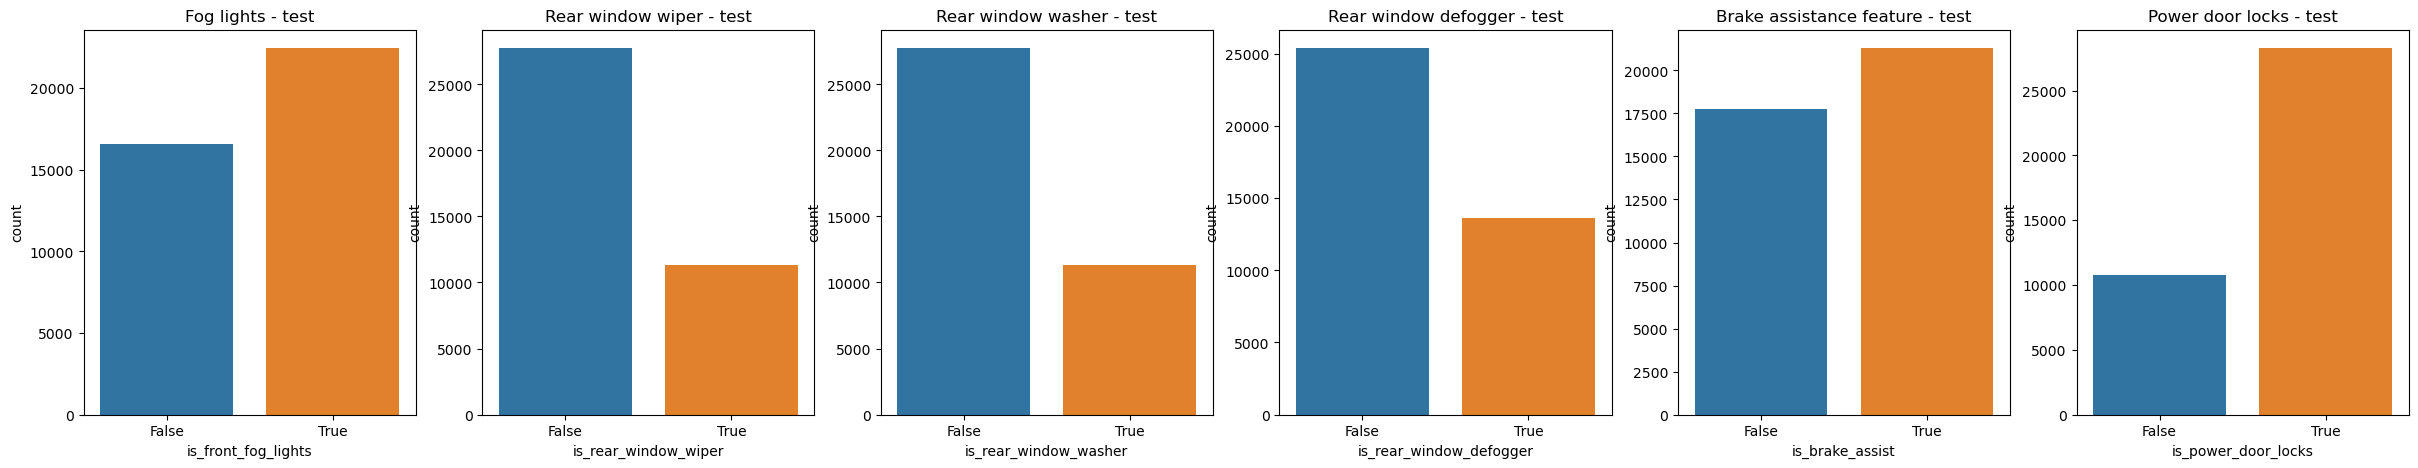

In [60]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_front_fog_lights", data = test, ax = ax[0])
ax[0].set_title("Fog lights - test")
sns.countplot(x = "is_rear_window_wiper", data = test, ax = ax[1])
ax[1].set_title("Rear window wiper - test")
sns.countplot(x = "is_rear_window_washer", data = test, ax = ax[2])
ax[2].set_title("Rear window washer - test")
sns.countplot(x = "is_rear_window_defogger", data = test, ax = ax[3])
ax[3].set_title("Rear window defogger - test")
sns.countplot(x = "is_brake_assist", data = test, ax = ax[4])
ax[4].set_title("Brake assistance feature - test")
sns.countplot(x = "is_power_door_locks", data = test, ax = ax[5])
ax[5].set_title("Power door locks - test")

plt.show()

### `is_central_locking`
Boolean flag indicating whether the central locking feature is available in the car or not  
### `is_power_steering`
Boolean flag indicating whether power steering is available in the car or not  
### `is_driver_seat_height_adjustable`
Boolean flag indicating whether the height of the driver seat is adjustable or not  
### `is_day_night_rear_view_mirror`
Boolean flag indicating whether day & night rearview mirror is present in the car or not  
### `is_ecw`
Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not  
### `is_speed_alert`
Boolean flag indicating whether the speed alert system is available in the car or not

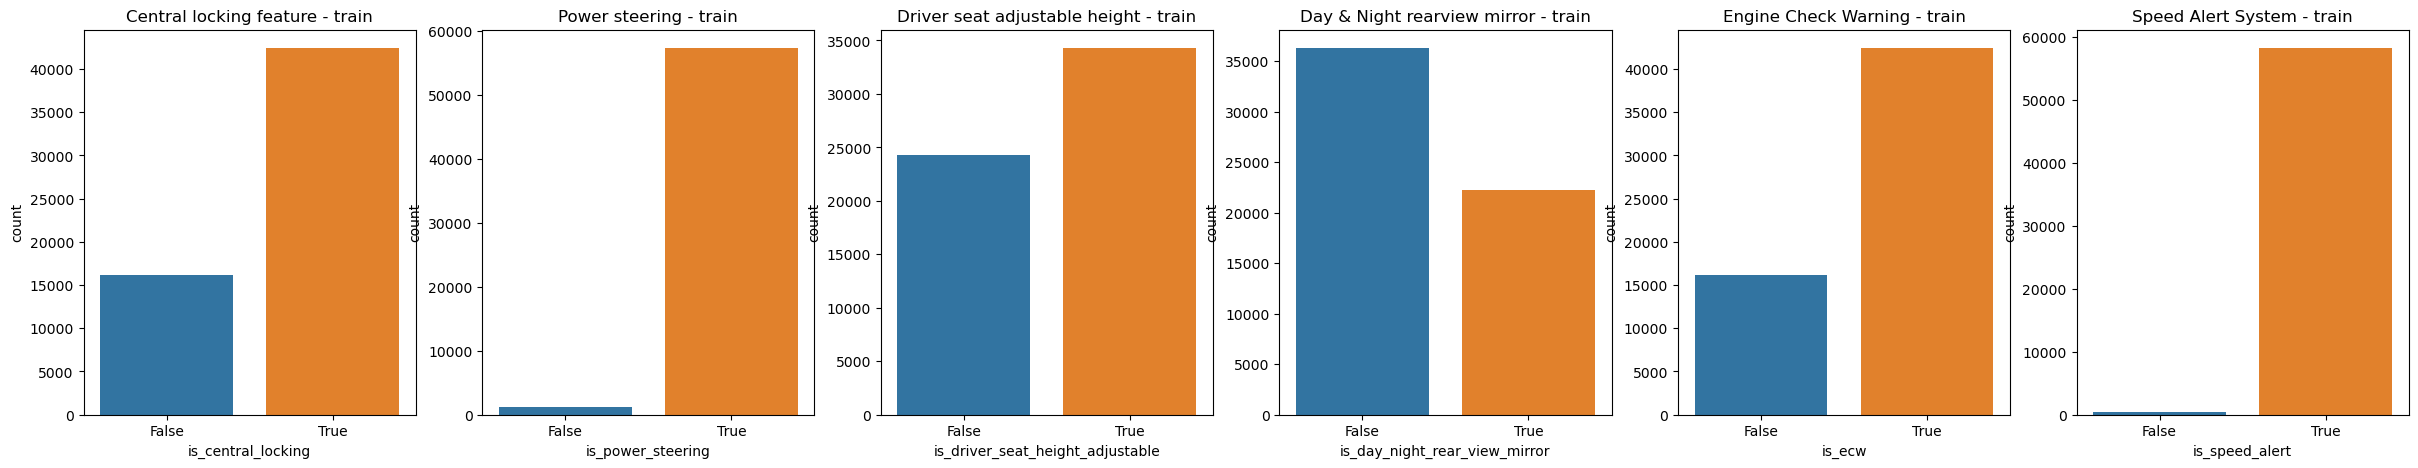

In [61]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_central_locking", data = train, ax = ax[0])
ax[0].set_title("Central locking feature - train")
sns.countplot(x = "is_power_steering", data = train, ax = ax[1])
ax[1].set_title("Power steering - train")
sns.countplot(x = "is_driver_seat_height_adjustable", data = train, ax = ax[2])
ax[2].set_title("Driver seat adjustable height - train")
sns.countplot(x = "is_day_night_rear_view_mirror", data = train, ax = ax[3])
ax[3].set_title("Day & Night rearview mirror - train")
sns.countplot(x = "is_ecw", data = train, ax = ax[4])
ax[4].set_title("Engine Check Warning - train")
sns.countplot(x = "is_speed_alert", data = train, ax = ax[5])
ax[5].set_title("Speed Alert System - train")

plt.show()

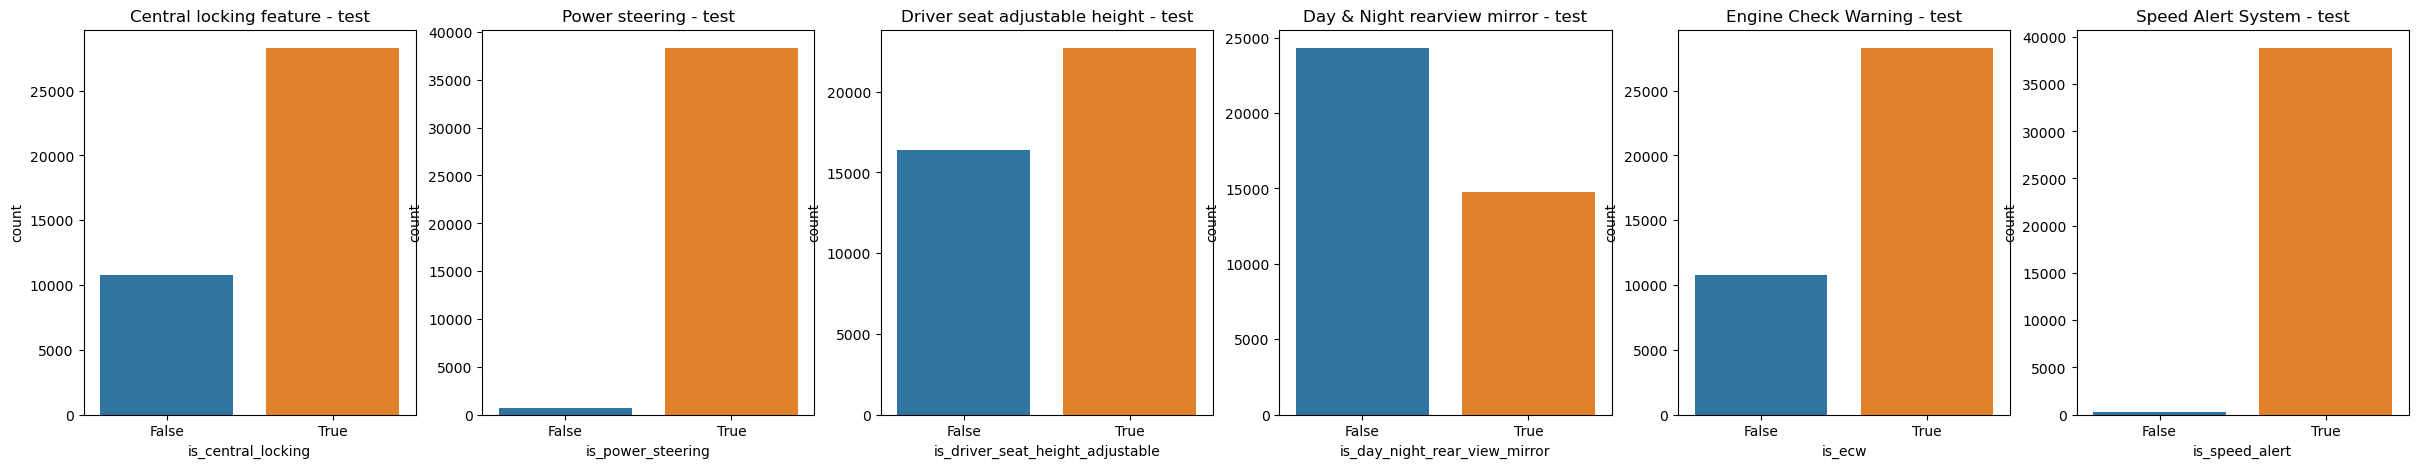

In [62]:
fig, ax = plt.subplots(1,6, figsize = (30, 5))
sns.countplot(x = "is_central_locking", data = test, ax = ax[0])
ax[0].set_title("Central locking feature - test")
sns.countplot(x = "is_power_steering", data = test, ax = ax[1])
ax[1].set_title("Power steering - test")
sns.countplot(x = "is_driver_seat_height_adjustable", data = test, ax = ax[2])
ax[2].set_title("Driver seat adjustable height - test")
sns.countplot(x = "is_day_night_rear_view_mirror", data = test, ax = ax[3])
ax[3].set_title("Day & Night rearview mirror - test")
sns.countplot(x = "is_ecw", data = test, ax = ax[4])
ax[4].set_title("Engine Check Warning - test")
sns.countplot(x = "is_speed_alert", data = test, ax = ax[5])
ax[5].set_title("Speed Alert System - test")

plt.show()

### `ncap_rating`
Safety rating given by NCAP (out of 5)

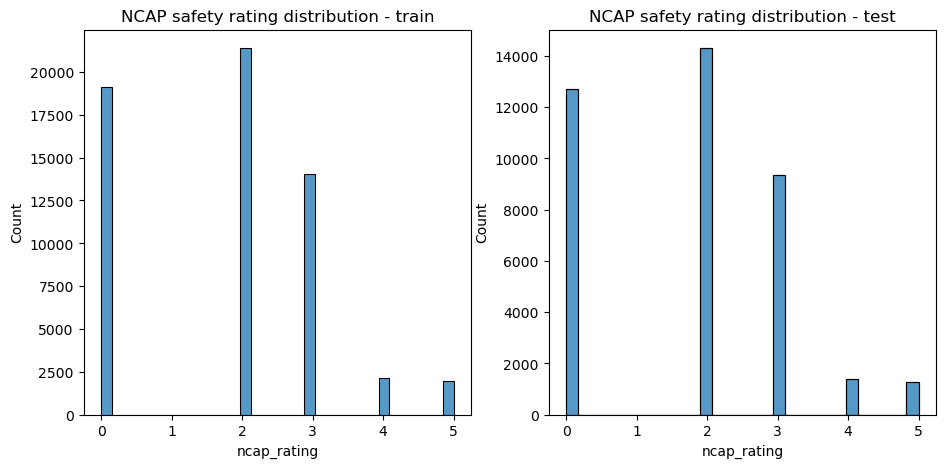

In [63]:
fig, ax = plt.subplots(1,2, figsize = (11, 5))
sns.histplot(x = "ncap_rating", data = train, ax = ax[0])
ax[0].set_title("NCAP safety rating distribution - train")
sns.histplot(x = "ncap_rating", data = test, ax = ax[1])
ax[1].set_title("NCAP safety rating distribution - test")

plt.show()

### `is_claim`
Outcome - Boolean flag indicating whether the policyholder file a claim in the next 6 months or not

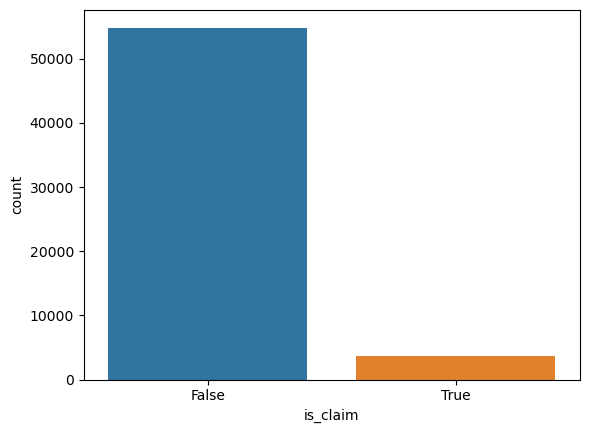

In [64]:
sns.countplot(x = "is_claim", data = train)
plt.show()

## Explore the relationships between variables

### Numeric Variables

In [65]:
corr_int_float = train.select_dtypes(include = ["int", "float"]).corr()

[]

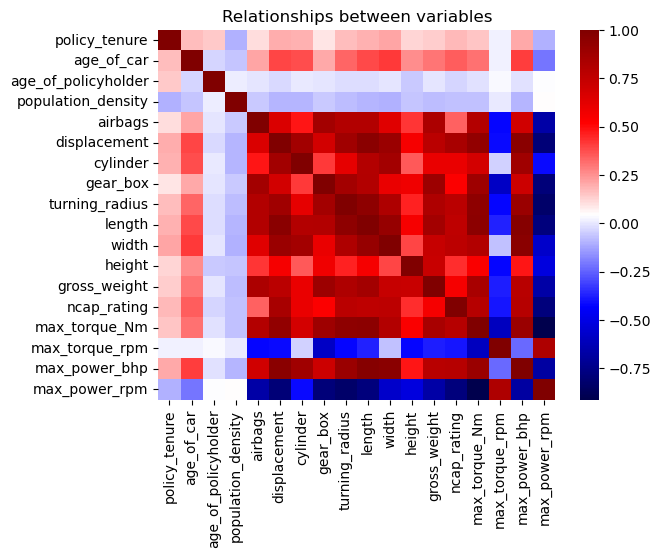

In [66]:
sns.heatmap(corr_int_float, cmap = "seismic")
plt.title("Relationships between variables")
plt.plot()

## Explore the relationships between variables and the target

### `is_claim` vs Numeric Variables

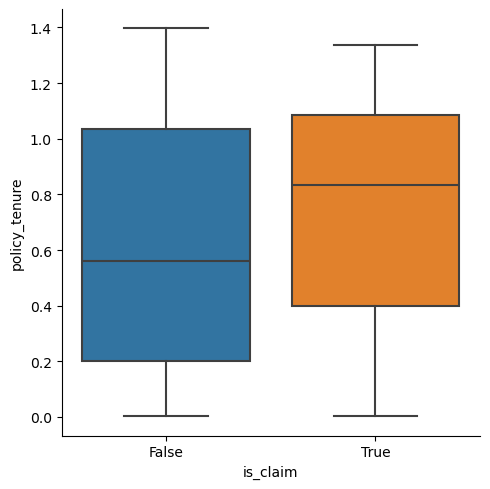

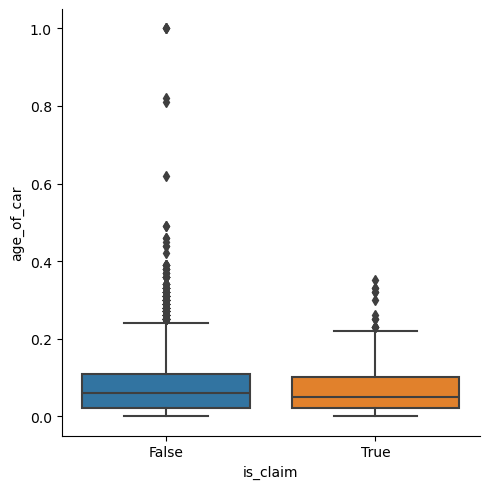

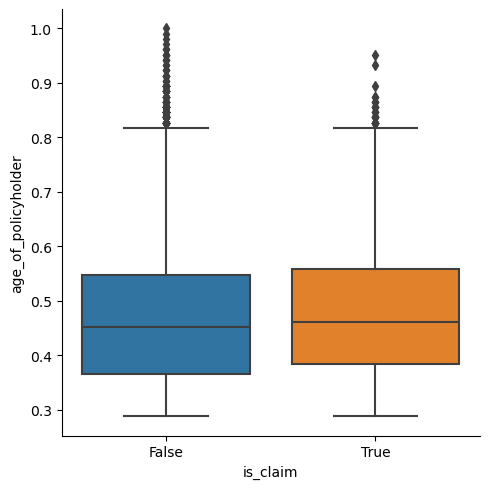

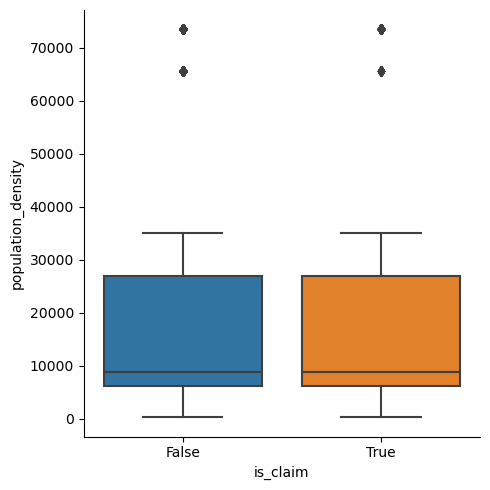

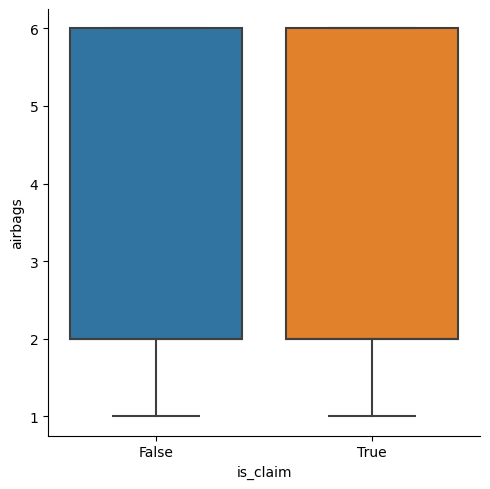

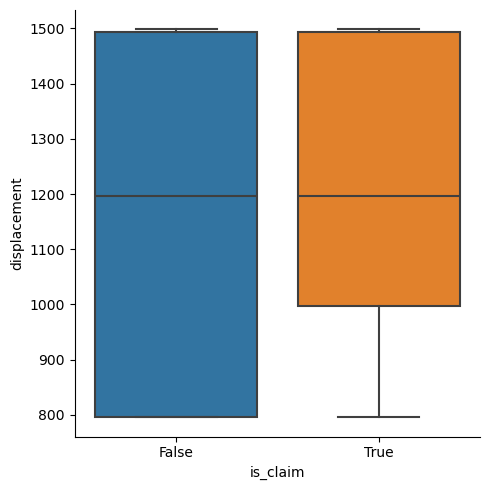

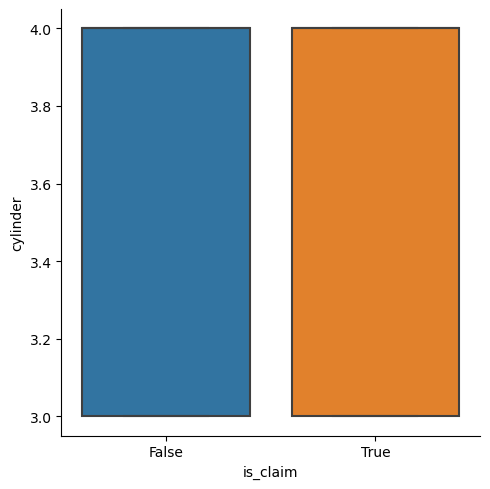

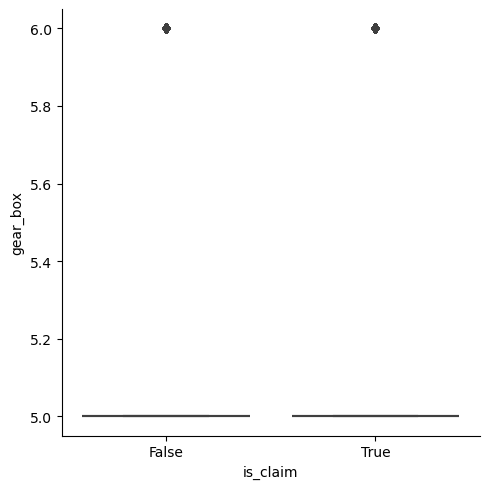

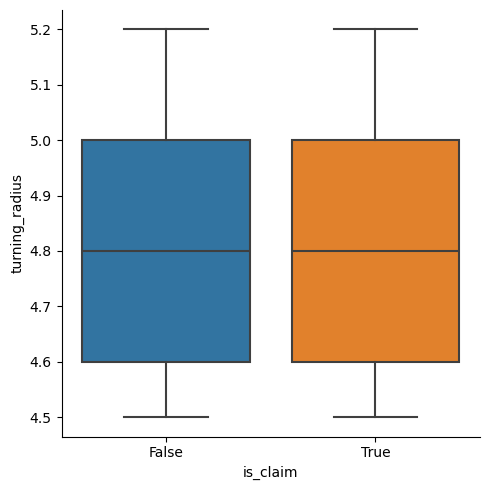

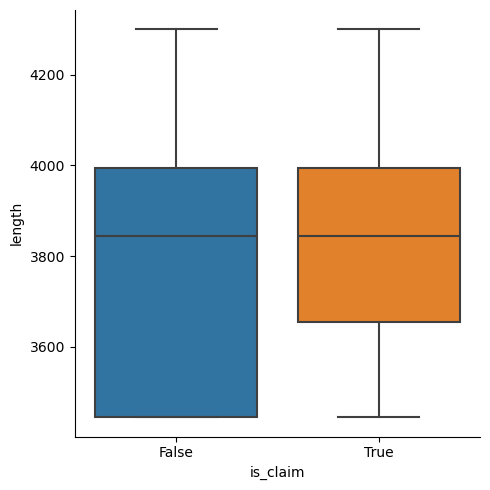

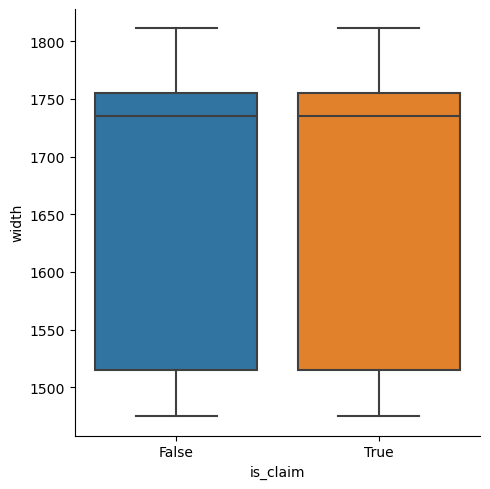

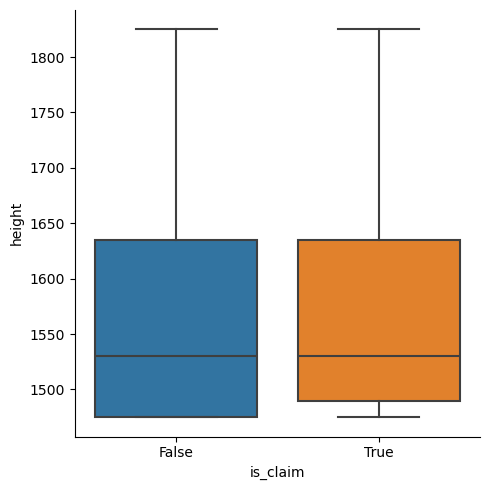

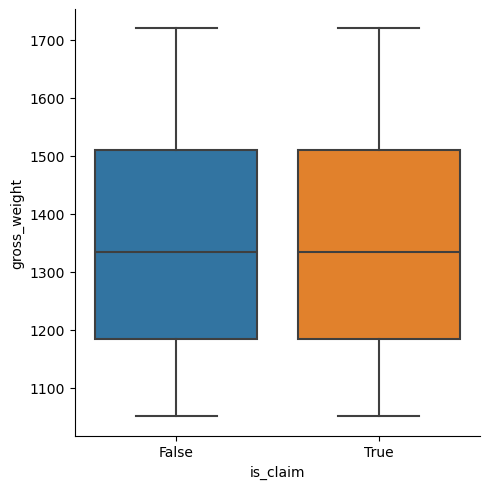

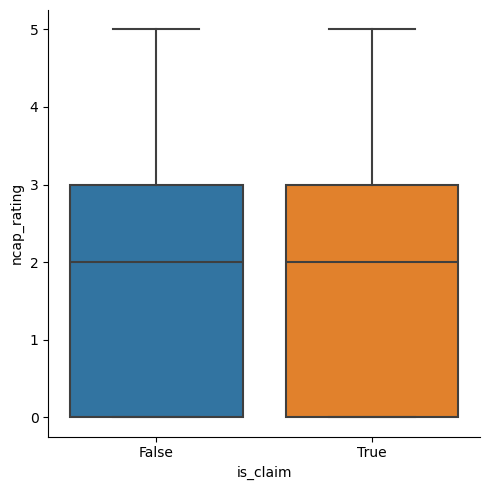

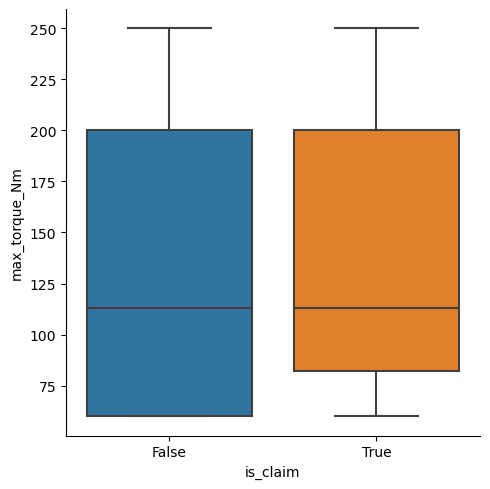

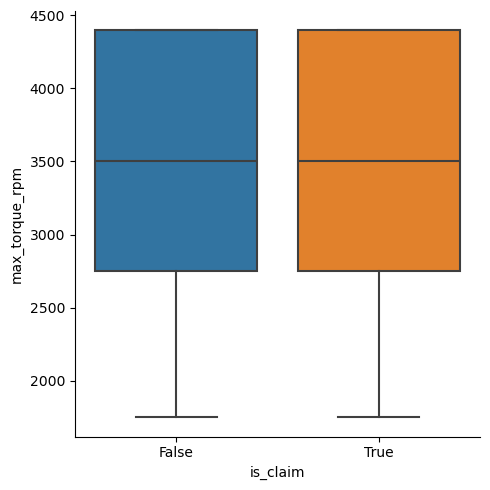

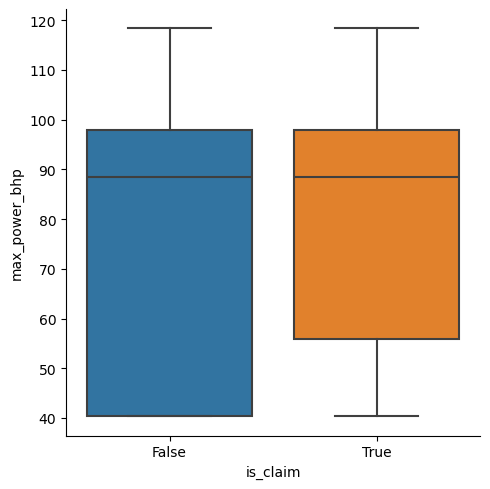

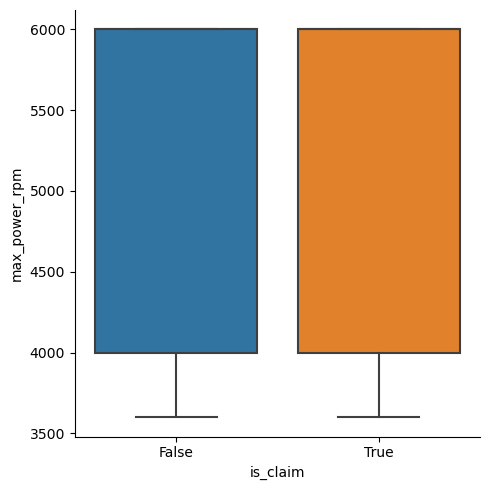

In [67]:
for numeric_var in train.select_dtypes(include = ["int", "float"]).columns:
    sns.catplot(x = "is_claim", y = numeric_var, data = train, kind = "box")
    plt.show()

### `is_claim` vs Categorical Variables

In [68]:
for cat_var in train.select_dtypes("category").columns:
    print(f"Claim proportion per {cat_var}")
    display(train.groupby(cat_var)["is_claim"].value_counts(normalize = True).unstack().sort_values(by = False, ascending = False).T)

Claim proportion per area_cluster


area_cluster,C17,C20,C10,C15,C9,C7,C1,C12,C13,C16,...,C6,C8,C2,C3,C19,C21,C4,C14,C22,C18
is_claim,,,,,,,,,,,,,,,,,,,,,
False,0.961382,0.954128,0.95309,0.950713,0.950256,0.9497,0.948229,0.945249,0.943032,0.942643,...,0.938202,0.93013,0.929175,0.929028,0.92542,0.923483,0.923308,0.923224,0.917874,0.892562
True,0.038618,0.045872,0.04691,0.049287,0.049744,0.0503,0.051771,0.054751,0.056968,0.057357,...,0.061798,0.06987,0.070825,0.070972,0.07458,0.076517,0.076692,0.076776,0.082126,0.107438


Claim proportion per make


make,2,5,3,1,4
is_claim,,,,,
False,0.94606,0.937086,0.935725,0.935608,0.933197
True,0.05394,0.062914,0.064275,0.064392,0.066803


Claim proportion per segment


segment,B1,Utility,A,C1,C2,B2
is_claim,,,,,,
False,0.941529,0.93962,0.939611,0.935901,0.935725,0.931419
True,0.058471,0.06038,0.060389,0.064099,0.064275,0.068581


Claim proportion per model


model,M11,M3,M8,M10,M1,M9,M4,M6,M7,M5,M2
is_claim,,,,,,,,,,,
False,0.958678,0.94606,0.941529,0.93962,0.938587,0.937086,0.935725,0.931838,0.931633,0.927409,0.925926
True,0.041322,0.05394,0.058471,0.06038,0.061413,0.062914,0.064275,0.068162,0.068367,0.072591,0.074074


Claim proportion per fuel_type


fuel_type,CNG,Diesel,Petrol
is_claim,,,
False,0.939252,0.935138,0.933616
True,0.060748,0.064862,0.066384


Claim proportion per engine_type


engine_type,1.5 Turbocharged Revotron,1.0 SCe,K10C,G12B,F8D Petrol Engine,i-DTEC,1.5 L U2 CRDi,K Series Dual jet,1.2 L K Series Engine,1.5 Turbocharged Revotorq,1.2 L K12N Dualjet
is_claim,,,,,,,,,,,
False,0.958678,0.94606,0.941529,0.93962,0.938587,0.937086,0.935725,0.931838,0.931633,0.927409,0.925926
True,0.041322,0.05394,0.058471,0.06038,0.061413,0.062914,0.064275,0.068162,0.068367,0.072591,0.074074


Claim proportion per rear_brakes_type


rear_brakes_type,Drum,Disc
is_claim,,
False,0.936129,0.935725
True,0.063871,0.064275


Claim proportion per transmission_type


transmission_type,Manual,Automatic
is_claim,,
False,0.936146,0.935819
True,0.063854,0.064181


Claim proportion per steering_type


steering_type,Manual,Power,Electric
is_claim,,,
False,0.93962,0.937974,0.933127
True,0.06038,0.062026,0.066873


### `is_claim` vs Object Variables

In [69]:
for obj_var in train.select_dtypes("object").columns:
    print(f"Claim proportion per {obj_var}")
    display(train.groupby(obj_var)["is_claim"].value_counts(normalize = True).unstack().sort_values(by = False, ascending = False).T)

Claim proportion per policy_id


policy_id,ID00001,ID39051,ID39054,ID39055,ID39056,ID39057,ID39058,ID39059,ID39060,ID39061,...,ID58427,ID58468,ID58474,ID58482,ID58510,ID58560,ID58568,ID58574,ID58575,ID58582
is_claim,,,,,,,,,,,,,,,,,,,,,
False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Claim proportion per max_torque


max_torque,170Nm@4000rpm,91Nm@4250rpm,82.1Nm@3400rpm,85Nm@3000rpm,60Nm@3500rpm,200Nm@1750rpm,250Nm@2750rpm,113Nm@4400rpm,200Nm@3000rpm
is_claim,,,,,,,,,
False,0.958678,0.94606,0.941529,0.93962,0.938587,0.937086,0.935725,0.931445,0.927409
True,0.041322,0.05394,0.058471,0.06038,0.061413,0.062914,0.064275,0.068555,0.072591


Claim proportion per max_power


max_power,118.36bhp@5500rpm,67.06bhp@5500rpm,55.92bhp@5300rpm,61.68bhp@6000rpm,40.36bhp@6000rpm,97.89bhp@3600rpm,113.45bhp@4000rpm,88.50bhp@6000rpm,88.77bhp@4000rpm
is_claim,,,,,,,,,
False,0.958678,0.94606,0.941529,0.93962,0.938587,0.937086,0.935725,0.931445,0.927409
True,0.041322,0.05394,0.058471,0.06038,0.061413,0.062914,0.064275,0.068555,0.072591


### `is_claim` vs Boolean Variables

In [70]:
for bool_var in train.select_dtypes("bool").columns:
    if bool_var != "is_claim":
        print(f"Claim proportion per {bool_var}")
        display(train.groupby(bool_var)["is_claim"].value_counts(normalize = True).unstack().sort_values(by = False, ascending = False).T)
    else:
        pass

Claim proportion per is_esc


is_esc,False,True
is_claim,,
False,0.936528,0.934949
True,0.063472,0.065051


Claim proportion per is_adjustable_steering


is_adjustable_steering,False,True
is_claim,,
False,0.940258,0.933288
True,0.059742,0.066712


Claim proportion per is_tpms


is_tpms,False,True
is_claim,,
False,0.936129,0.935725
True,0.063871,0.064275


Claim proportion per is_parking_sensors


is_parking_sensors,False,True
is_claim,,
False,0.94606,0.935609
True,0.05394,0.064391


Claim proportion per is_parking_camera


is_parking_camera,True,False
is_claim,,
False,0.936298,0.935862
True,0.063702,0.064138


Claim proportion per is_front_fog_lights


is_front_fog_lights,False,True
is_claim,,
False,0.939426,0.933565
True,0.060574,0.066435


Claim proportion per is_rear_window_wiper


is_rear_window_wiper,False,True
is_claim,,
False,0.936446,0.935016
True,0.063554,0.064984


Claim proportion per is_rear_window_washer


is_rear_window_washer,False,True
is_claim,,
False,0.936446,0.935016
True,0.063554,0.064984


Claim proportion per is_rear_window_defogger


is_rear_window_defogger,False,True
is_claim,,
False,0.936497,0.935169
True,0.063503,0.064831


Claim proportion per is_brake_assist


is_brake_assist,False,True
is_claim,,
False,0.938974,0.933617
True,0.061026,0.066383


Claim proportion per is_power_door_locks


is_power_door_locks,False,True
is_claim,,
False,0.938664,0.93503
True,0.061336,0.06497


Claim proportion per is_central_locking


is_central_locking,False,True
is_claim,,
False,0.938664,0.93503
True,0.061336,0.06497


Claim proportion per is_power_steering


is_power_steering,False,True
is_claim,,
False,0.93962,0.935957
True,0.06038,0.064043


Claim proportion per is_driver_seat_height_adjustable


is_driver_seat_height_adjustable,False,True
is_claim,,
False,0.939138,0.933831
True,0.060862,0.066169


Claim proportion per is_day_night_rear_view_mirror


is_day_night_rear_view_mirror,False,True
is_claim,,
False,0.937564,0.933537
True,0.062436,0.066463


Claim proportion per is_ecw


is_ecw,False,True
is_claim,,
False,0.938664,0.93503
True,0.061336,0.06497


Claim proportion per is_speed_alert


is_speed_alert,False,True
is_claim,,
False,0.958678,0.935891
True,0.041322,0.064109


## Null Hypothesis Significance Testing

### Proportions Z test

In [71]:
train.groupby("is_speed_alert")["is_claim"].value_counts()

is_speed_alert  is_claim
False           False         348
                True           15
True            False       54496
                True         3733
Name: count, dtype: int64

In [72]:
stat, pval = proportions_ztest([15, 3733], [348 + 15, 54496 + 3733])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different
0.0769413619339836


In [73]:
train.groupby("max_torque")["is_claim"].value_counts()

max_torque      is_claim
113Nm@4400rpm   False       16576
                True         1220
170Nm@4000rpm   False         348
                True           15
200Nm@1750rpm   False        1981
                True          133
200Nm@3000rpm   False        1482
                True          116
250Nm@2750rpm   False       13117
                True          901
60Nm@3500rpm    False       14030
                True          918
82.1Nm@3400rpm  False        3929
                True          244
85Nm@3000rpm    False        1136
                True           73
91Nm@4250rpm    False        2245
                True          128
Name: count, dtype: int64

In [74]:
stat, pval = proportions_ztest([15, 116], [348 + 15, 1482 + 116])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Reject the null hypothesis: The proportions are different
0.031248106224691423


In [75]:
train.groupby("max_power")["is_claim"].value_counts()

max_power          is_claim
113.45bhp@4000rpm  False       13117
                   True          901
118.36bhp@5500rpm  False         348
                   True           15
40.36bhp@6000rpm   False       14030
                   True          918
55.92bhp@5300rpm   False        3929
                   True          244
61.68bhp@6000rpm   False        1136
                   True           73
67.06bhp@5500rpm   False        2245
                   True          128
88.50bhp@6000rpm   False       16576
                   True         1220
88.77bhp@4000rpm   False        1482
                   True          116
97.89bhp@3600rpm   False        1981
                   True          133
Name: count, dtype: int64

In [76]:
stat, pval = proportions_ztest([15, 116], [348 + 15, 1482 + 116])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Reject the null hypothesis: The proportions are different
0.031248106224691423


In [77]:
train.groupby("engine_type")["is_claim"].value_counts()

engine_type                is_claim
1.0 SCe                    False        2245
                           True          128
1.2 L K Series Engine      False        2739
                           True          201
1.2 L K12N Dualjet         False        1000
                           True           80
1.5 L U2 CRDi              False       13117
                           True          901
1.5 Turbocharged Revotorq  False        1482
                           True          116
1.5 Turbocharged Revotron  False         348
                           True           15
F8D Petrol Engine          False       14030
                           True          918
G12B                       False        1136
                           True           73
K Series Dual jet          False       12837
                           True          939
K10C                       False        3929
                           True          244
i-DTEC                     False        1981
                   

In [78]:
stat, pval = proportions_ztest([15, 80], [348 + 15, 1000 + 80])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Reject the null hypothesis: The proportions are different
0.029492604253705156


In [79]:
train.groupby("model")["is_claim"].value_counts()

model  is_claim
M1     False       14030
       True          918
M10    False        1136
       True           73
M11    False         348
       True           15
M2     False        1000
       True           80
M3     False        2245
       True          128
M4     False       13117
       True          901
M5     False        1482
       True          116
M6     False       12837
       True          939
M7     False        2739
       True          201
M8     False        3929
       True          244
M9     False        1981
       True          133
Name: count, dtype: int64

In [80]:
stat, pval = proportions_ztest([15, 80], [348 + 15, 1000 + 80])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Reject the null hypothesis: The proportions are different
0.029492604253705156


In [81]:
train.groupby("segment")["is_claim"].value_counts()

segment  is_claim
A        False       16275
         True         1046
B1       False        3929
         True          244
B2       False       17058
         True         1256
C1       False        3329
         True          228
C2       False       13117
         True          901
Utility  False        1136
         True           73
Name: count, dtype: int64

In [82]:
stat, pval = proportions_ztest([244, 1256], [3929 + 244, 17058 + 1256])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Reject the null hypothesis: The proportions are different
0.018164796314432102


In [83]:
train.groupby("make")["is_claim"].value_counts()

make  is_claim
1     False       35671
      True         2455
2     False        2245
      True          128
3     False       13117
      True          901
4     False        1830
      True          131
5     False        1981
      True          133
Name: count, dtype: int64

In [84]:
stat, pval = proportions_ztest([128, 131], [2245 + 128, 1830 + 131])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different
0.07539593602411969


In [85]:
train.groupby("area_cluster")["is_claim"].value_counts()

area_cluster  is_claim
C1            False        1392
              True           76
C10           False        3007
              True          148
C11           False        1140
              True           72
C12           False        1502
              True           87
C13           False        3228
              True          195
C14           False        3379
              True          281
C15           False         733
              True           38
C16           False         378
              True           23
C17           False         473
              True           19
C18           False         216
              True           26
C19           False         881
              True           71
C2            False        6822
              True          520
C20           False         104
              True            5
C21           False         350
              True           29
C22           False         190
              True           17
C3            Fal

In [86]:
stat, pval = proportions_ztest([19, 26], [473 + 19, 216 + 26])

if pval < 0.05:
    print("Reject the null hypothesis: The proportions are different")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the proportions are different")
print(pval)

Reject the null hypothesis: The proportions are different
0.00025844588510986365


### Means Hypothesis Testing

Define function to test the means for the cases where there is no Variance Homogeneity

In [87]:
def perm_distributions_comparison(sample1, sample2):
    differences = np.empty(1000)

    for i in range(1000):
        both = np.concatenate((sample1, sample2))
        both_perm = np.random.permutation(both)
        perm_sample1 = both_perm[:len(sample1)]
        perm_sample2 = both_perm[len(sample1):]
        diff = np.mean(perm_sample1) - np.mean(perm_sample2)
        differences[i] = diff

    observed_diff = np.mean(sample1) - np.mean(sample2)
    if observed_diff > np.mean(differences):
        pval_perm = np.sum(observed_diff <= differences) / len(differences)
    else:
        pval_perm = np.sum(observed_diff > differences) / len(differences)

    if pval_perm < 0.05:
            print("Reject the null hypothesis: The distributions means are different")
    else:
            print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different")
    print(pval_perm)

In [88]:
sample1 = train[train["is_claim"] == True].max_power_bhp
sample2 = train[train["is_claim"] == False].max_power_bhp

# Variance Homogeneity Test
stat_levene, pval_levene = levene(sample1, sample2)

if pval_levene < 0.05: # If Variance Homogeneity use t test to compare distributions
    print("Variance Homogeneity Assumption")
    stat, pval = ttest_ind(sample1, sample2)
    if pval < 0.05:
        print("Reject the null hypothesis: The distributions means are different")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different")
    print(pval)
else: # Use permutations to compare distributions
    print("No Variance Homogeneity")
    perm_distributions_comparison(sample1, sample2)

Variance Homogeneity Assumption
Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different
0.06242825494755467


In [89]:
sample1 = train[train["is_claim"] == True].max_torque_Nm
sample2 = train[train["is_claim"] == False].max_torque_Nm

# Variance Homogeneity Test
stat_levene, pval_levene = levene(sample1, sample2)

if pval_levene < 0.05: # If Variance Homogeneity use t test to compare distributions
    print("Variance Homogeneity Assumption")
    stat, pval = ttest_ind(sample1, sample2)
    if pval < 0.05:
        print("Reject the null hypothesis: The distributions means are different")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different")
    print(pval)
else: # Use permutations to compare distributions
    print("No Variance Homogeneity")
    perm_distributions_comparison(sample1, sample2)

No Variance Homogeneity
Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different
0.154


In [90]:
sample1 = train[train["is_claim"] == True].length
sample2 = train[train["is_claim"] == False].length

# Variance Homogeneity Test
stat_levene, pval_levene = levene(sample1, sample2)

if pval_levene < 0.05: # If Variance Homogeneity use t test to compare distributions
    print("Variance Homogeneity Assumption")
    stat, pval = ttest_ind(sample1, sample2)
    if pval < 0.05:
        print("Reject the null hypothesis: The distributions means are different")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different")
    print(pval)
else: # Use permutations to compare distributions
    print("No Variance Homogeneity")
    perm_distributions_comparison(sample1, sample2)

No Variance Homogeneity
Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different
0.058


In [91]:
sample1 = train[train["is_claim"] == True].displacement
sample2 = train[train["is_claim"] == False].displacement

# Variance Homogeneity Test
stat_levene, pval_levene = levene(sample1, sample2)

if pval_levene < 0.05: # If Variance Homogeneity use t test to compare distributions
    print("Variance Homogeneity Assumption")
    stat, pval = ttest_ind(sample1, sample2)
    if pval < 0.05:
        print("Reject the null hypothesis: The distributions means are different")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different")
    print(pval)
else: # Use permutations to compare distributions
    print("No Variance Homogeneity")
    perm_distributions_comparison(sample1, sample2)

Variance Homogeneity Assumption
Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different
0.06310215766252036


In [92]:
sample1 = train[train["is_claim"] == True].policy_tenure
sample2 = train[train["is_claim"] == False].policy_tenure

# Variance Homogeneity Test
stat_levene, pval_levene = levene(sample1, sample2)

if pval_levene < 0.05: # If Variance Homogeneity use t test to compare distributions
    print("Variance Homogeneity Assumption")
    stat, pval = ttest_ind(sample1, sample2)
    if pval < 0.05:
        print("Reject the null hypothesis: The distributions means are different")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to affirm that the distributions means are different")
    print(pval)
else: # Use permutations to compare distributions
    print("No Variance Homogeneity")
    perm_distributions_comparison(sample1, sample2)

Variance Homogeneity Assumption
Reject the null hypothesis: The distributions means are different
3.0181155800813767e-81


In [93]:
train.to_csv("../data/process/train_EDA.csv", index = False)
test.to_csv("../data/process/test_EDA.csv", index = False)